## building the model

In [1]:
# importing data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importing basic machine learning libraries
import keras as ks
import sklearn as sk
import tensorflow as tf

In [3]:
# importing ANN libraries
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import regularizers
from sklearn.model_selection import KFold

In [4]:
# creating gaussian function for the RBF layer

def custom_gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'custom_gelu': Activation(custom_gelu)})

In [5]:
# creating the custom rmse for evaluation

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

## data manipulation

In [6]:
inputs = pd.read_csv('Cass1.csv',delimiter=',', header=None) #loading inputs from a different file 
print (inputs.shape)
targets = pd.read_csv('UTM1.csv',delimiter=',', header=None) # loading targets
print(targets.shape)


(48, 2)
(48, 2)


In [7]:
inputf = pd.read_csv('Cass_1.csv',delimiter=',', header=None) #loading inputs from a different file 
print (inputf.shape)
target = pd.read_csv('UTM_1.csv',delimiter=',', header=None) # loading targets
print(target.shape)


(17, 2)
(17, 2)


In [8]:
X_trainB = inputs
y_trainB = targets
X_testB = inputf
y_testB = target
y_trainB.shape

(48, 2)

### pre-processing


In [9]:
all_data = np.concatenate((inputs, targets),axis=1)
X = all_data[0:,:2]
y = all_data[0:,2:]

In [10]:
all_data.shape

(48, 4)

In [11]:
# fitting max - min scaler

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #scaler for the inputs
min_max_scaler.fit(X_trainB) #fitting the scaler

min_max_scaler_Target = preprocessing.MinMaxScaler() #scaler for targets
min_max_scaler_Target.fit(y_trainB)


MinMaxScaler()

In [12]:
# normalizing the training data

train_data_1 = min_max_scaler.transform(X_trainB)
train_targets_1 = min_max_scaler_Target.transform(y_trainB)
print (train_data_1.shape)
print (train_targets_1.shape)

(48, 2)
(48, 2)


In [13]:
# normalizing the testing data

test_data_1 = min_max_scaler.transform(X_testB)
test_targets_1 = min_max_scaler_Target.transform(y_testB)
print (test_data_1.shape)
print (test_targets_1.shape)

(17, 2)
(17, 2)


In [14]:
X_train = train_data_1
y_train = train_targets_1
X_test = test_data_1
y_test = test_targets_1

## Running the model

In [15]:
def linear(x):
    return x
get_custom_objects().update({'linear': Activation(linear)})

In [76]:
## Random seeding
np.random.seed(123)
tf.random.set_seed(123)
input_size=2
output_size=2

k = 3

num_val_samples = len(X_train) // k

num_epochs = 4600

all_scores =[]

labels =[]

prd = []
fold_val = []
fold_targ = []
all_mse =[]

for i in range(k):
    print('processing fold #', i)
    ## validation data comes from training data for each loop
    val_data = X_train[i * num_val_samples : (i +1)*num_val_samples]
    val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
    ## creating the folds
    partial_train_data = np.concatenate([X_train[:i*num_val_samples], X_train[(i + 1) *num_val_samples :]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i*num_val_samples], y_train[(i + 1) *num_val_samples :]], axis=0)         
    models = tf.keras.Sequential() 
    models.add(tf.keras.layers.Dense(56,  activation=linear,kernel_regularizer=regularizers.l2(0.0000001), input_shape = (2,))),
    models.add(tf.keras.layers.Dense(55, )),
    models.add(tf.keras.layers.Dense(2)),
    models.build((2, 2)),
               
   
                            
    custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    models.compile(optimizer=custom_optimizer,loss='mse')
# compiling the model 

    MLP = models.fit(partial_train_data, partial_train_targets, validation_data=(X_test, y_test), epochs = num_epochs, verbose=1)
    ## evaluate the mse, mae in validation data
  
    #val_mse, val_mae = models.evaluate(val_data, val_targets, verbose=1)
    ## Predict the test targets
    #preds = model.predict(X_test)
    ## evaluate on test datasets
  #  true_mse_mae = model.evaluate(test_data, test_targets)
    
    
   # all_scores.append(val_mae)
   # all_mse.append(val_mse)
    preds = models.predict(val_data)
    labels.append(val_targets)
    prd.append(preds)
    
    fold_val.append(val_data)
    fold_targ.append(val_targets)
    print (preds)


processing fold # 0
Epoch 1/4600
1/1 [==============================] - 0s 232ms/step - loss: 0.2883 - val_loss: 0.2920
Epoch 2/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.2602 - val_loss: 0.2639
Epoch 3/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.2353 - val_loss: 0.2389
Epoch 4/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.2133 - val_loss: 0.2167
Epoch 5/4600
1/1 [==============================] - 0s 35ms/step - loss: 0.1937 - val_loss: 0.1969
Epoch 6/4600
1/1 [==============================] - 0s 34ms/step - loss: 0.1763 - val_loss: 0.1793
Epoch 7/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.1609 - val_loss: 0.1636
Epoch 8/4600
1/1 [==============================] - 0s 32ms/step - loss: 0.1471 - val_loss: 0.1496
Epoch 9/4600
1/1 [==============================] - 0s 33ms/step - loss: 0.1349 - val_loss: 0.1370
Epoch 10/4600
1/1 [==============================] - 0s 39ms/step - loss: 0.1241 - val_l

1/1 [==============================] - 0s 26ms/step - loss: 0.0215 - val_loss: 0.0171
Epoch 83/4600
1/1 [==============================] - 0s 26ms/step - loss: 0.0212 - val_loss: 0.0169
Epoch 84/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0210 - val_loss: 0.0167
Epoch 85/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.0208 - val_loss: 0.0165
Epoch 86/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.0206 - val_loss: 0.0163
Epoch 87/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.0204 - val_loss: 0.0161
Epoch 88/4600
1/1 [==============================] - 0s 29ms/step - loss: 0.0202 - val_loss: 0.0159
Epoch 89/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0200 - val_loss: 0.0157
Epoch 90/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0198 - val_loss: 0.0155
Epoch 91/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.0196 - val_loss: 0.0154
Epoch 92/4600


Epoch 163/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 164/4600
1/1 [==============================] - 0s 29ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 165/4600
1/1 [==============================] - 0s 33ms/step - loss: 0.0094 - val_loss: 0.0067
Epoch 166/4600
1/1 [==============================] - ETA: 0s - loss: 0.009 - 0s 26ms/step - loss: 0.0093 - val_loss: 0.0066
Epoch 167/4600
1/1 [==============================] - 0s 26ms/step - loss: 0.0092 - val_loss: 0.0065
Epoch 168/4600
1/1 [==============================] - 0s 26ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 169/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0091 - val_loss: 0.0064
Epoch 170/4600
1/1 [==============================] - 0s 34ms/step - loss: 0.0090 - val_loss: 0.0063
Epoch 171/4600
1/1 [==============================] - ETA: 0s - loss: 0.008 - 0s 32ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 172/4600
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 244/4600
1/1 [==============================] - 0s 38ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 245/4600
1/1 [==============================] - 0s 37ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 246/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 247/4600
1/1 [==============================] - 0s 34ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 248/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 249/4600
1/1 [==============================] - 0s 33ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 250/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 251/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 252/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch

Epoch 324/4600
1/1 [==============================] - 0s 44ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 325/4600
1/1 [==============================] - 0s 33ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 326/4600
1/1 [==============================] - 0s 37ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 327/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 328/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 329/4600
1/1 [==============================] - 0s 40ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 330/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 331/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 332/4600
1/1 [==============================] - 0s 38ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 333/4600
1/1 [==============================] - 0s 36ms/step - loss: 0.0024 - val_los

Epoch 404/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - val_loss: 7.8361e-04
Epoch 405/4600
1/1 [==============================] - 0s 32ms/step - loss: 0.0015 - val_loss: 7.7808e-04
Epoch 406/4600
1/1 [==============================] - ETA: 0s - loss: 0.001 - 0s 34ms/step - loss: 0.0015 - val_loss: 7.7259e-04
Epoch 407/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.0015 - val_loss: 7.6716e-04
Epoch 408/4600
1/1 [==============================] - 0s 43ms/step - loss: 0.0014 - val_loss: 7.6177e-04
Epoch 409/4600
1/1 [==============================] - 0s 49ms/step - loss: 0.0014 - val_loss: 7.5643e-04
Epoch 410/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - val_loss: 7.5113e-04
Epoch 411/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 7.4588e-04
Epoch 412/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0014 - val_loss: 7.4068e-04
Epoch 413/4600
1/1 [===========

1/1 [==============================] - 0s 31ms/step - loss: 9.1577e-04 - val_loss: 4.6686e-04
Epoch 482/4600
1/1 [==============================] - 0s 30ms/step - loss: 9.1023e-04 - val_loss: 4.6387e-04
Epoch 483/4600
1/1 [==============================] - 0s 28ms/step - loss: 9.0472e-04 - val_loss: 4.6090e-04
Epoch 484/4600
1/1 [==============================] - 0s 28ms/step - loss: 8.9925e-04 - val_loss: 4.5795e-04
Epoch 485/4600
1/1 [==============================] - 0s 27ms/step - loss: 8.9381e-04 - val_loss: 4.5502e-04
Epoch 486/4600
1/1 [==============================] - 0s 24ms/step - loss: 8.8841e-04 - val_loss: 4.5212e-04
Epoch 487/4600
1/1 [==============================] - 0s 26ms/step - loss: 8.8304e-04 - val_loss: 4.4923e-04
Epoch 488/4600
1/1 [==============================] - 0s 33ms/step - loss: 8.7771e-04 - val_loss: 4.4637e-04
Epoch 489/4600
1/1 [==============================] - 0s 24ms/step - loss: 8.7241e-04 - val_loss: 4.4353e-04
Epoch 490/4600
1/1 [==============

Epoch 556/4600
1/1 [==============================] - 0s 31ms/step - loss: 5.8417e-04 - val_loss: 2.9208e-04
Epoch 557/4600
1/1 [==============================] - 0s 27ms/step - loss: 5.8071e-04 - val_loss: 2.9030e-04
Epoch 558/4600
1/1 [==============================] - 0s 28ms/step - loss: 5.7728e-04 - val_loss: 2.8853e-04
Epoch 559/4600
1/1 [==============================] - 0s 43ms/step - loss: 5.7386e-04 - val_loss: 2.8678e-04
Epoch 560/4600
1/1 [==============================] - 0s 30ms/step - loss: 5.7047e-04 - val_loss: 2.8503e-04
Epoch 561/4600
1/1 [==============================] - 0s 25ms/step - loss: 5.6709e-04 - val_loss: 2.8330e-04
Epoch 562/4600
1/1 [==============================] - 0s 25ms/step - loss: 5.6374e-04 - val_loss: 2.8157e-04
Epoch 563/4600
1/1 [==============================] - 0s 25ms/step - loss: 5.6041e-04 - val_loss: 2.7986e-04
Epoch 564/4600
1/1 [==============================] - 0s 29ms/step - loss: 5.5709e-04 - val_loss: 2.7816e-04
Epoch 565/4600
1/1 

1/1 [==============================] - 0s 34ms/step - loss: 3.7718e-04 - val_loss: 1.8684e-04
Epoch 631/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.7496e-04 - val_loss: 1.8572e-04
Epoch 632/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.7276e-04 - val_loss: 1.8462e-04
Epoch 633/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.7057e-04 - val_loss: 1.8352e-04
Epoch 634/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6839e-04 - val_loss: 1.8242e-04
Epoch 635/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6622e-04 - val_loss: 1.8134e-04
Epoch 636/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6407e-04 - val_loss: 1.8026e-04
Epoch 637/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6193e-04 - val_loss: 1.7918e-04
Epoch 638/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.5980e-04 - val_loss: 1.7812e-04
Epoch 639/4600
1/1 [==============

1/1 [==============================] - 0s 27ms/step - loss: 2.4238e-04 - val_loss: 1.1956e-04
Epoch 706/4600
1/1 [==============================] - 0s 25ms/step - loss: 2.4096e-04 - val_loss: 1.1885e-04
Epoch 707/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.3954e-04 - val_loss: 1.1815e-04
Epoch 708/4600
1/1 [==============================] - 0s 24ms/step - loss: 2.3813e-04 - val_loss: 1.1745e-04
Epoch 709/4600
1/1 [==============================] - 0s 21ms/step - loss: 2.3673e-04 - val_loss: 1.1676e-04
Epoch 710/4600
1/1 [==============================] - 0s 23ms/step - loss: 2.3534e-04 - val_loss: 1.1607e-04
Epoch 711/4600
1/1 [==============================] - 0s 23ms/step - loss: 2.3395e-04 - val_loss: 1.1538e-04
Epoch 712/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.3257e-04 - val_loss: 1.1470e-04
Epoch 713/4600
1/1 [==============================] - 0s 24ms/step - loss: 2.3121e-04 - val_loss: 1.1402e-04
Epoch 714/4600
1/1 [==============

1/1 [==============================] - 0s 26ms/step - loss: 1.5562e-04 - val_loss: 7.6652e-05
Epoch 781/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.5470e-04 - val_loss: 7.6200e-05
Epoch 782/4600
1/1 [==============================] - 0s 25ms/step - loss: 1.5379e-04 - val_loss: 7.5749e-05
Epoch 783/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.5288e-04 - val_loss: 7.5302e-05
Epoch 784/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.5198e-04 - val_loss: 7.4857e-05
Epoch 785/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.5108e-04 - val_loss: 7.4415e-05
Epoch 786/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.5019e-04 - val_loss: 7.3975e-05
Epoch 787/4600
1/1 [==============================] - 0s 25ms/step - loss: 1.4930e-04 - val_loss: 7.3539e-05
Epoch 788/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.4842e-04 - val_loss: 7.3104e-05
Epoch 789/4600
1/1 [==============

1/1 [==============================] - 0s 42ms/step - loss: 9.9769e-05 - val_loss: 4.9153e-05
Epoch 856/4600
1/1 [==============================] - 0s 29ms/step - loss: 9.9178e-05 - val_loss: 4.8863e-05
Epoch 857/4600
1/1 [==============================] - 0s 26ms/step - loss: 9.8592e-05 - val_loss: 4.8574e-05
Epoch 858/4600
1/1 [==============================] - 0s 30ms/step - loss: 9.8008e-05 - val_loss: 4.8287e-05
Epoch 859/4600
1/1 [==============================] - 0s 34ms/step - loss: 9.7428e-05 - val_loss: 4.8002e-05
Epoch 860/4600
1/1 [==============================] - 0s 32ms/step - loss: 9.6851e-05 - val_loss: 4.7718e-05
Epoch 861/4600
1/1 [==============================] - 0s 29ms/step - loss: 9.6277e-05 - val_loss: 4.7436e-05
Epoch 862/4600
1/1 [==============================] - ETA: 0s - loss: 9.5707e-0 - 0s 23ms/step - loss: 9.5707e-05 - val_loss: 4.7156e-05
Epoch 863/4600
1/1 [==============================] - 0s 27ms/step - loss: 9.5141e-05 - val_loss: 4.6878e-05
Epoch 

1/1 [==============================] - 0s 28ms/step - loss: 6.3880e-05 - val_loss: 3.1520e-05
Epoch 931/4600
1/1 [==============================] - 0s 34ms/step - loss: 6.3501e-05 - val_loss: 3.1334e-05
Epoch 932/4600
1/1 [==============================] - 0s 30ms/step - loss: 6.3124e-05 - val_loss: 3.1149e-05
Epoch 933/4600
1/1 [==============================] - 0s 25ms/step - loss: 6.2749e-05 - val_loss: 3.0965e-05
Epoch 934/4600
1/1 [==============================] - 0s 22ms/step - loss: 6.2377e-05 - val_loss: 3.0782e-05
Epoch 935/4600
1/1 [==============================] - 0s 26ms/step - loss: 6.2007e-05 - val_loss: 3.0600e-05
Epoch 936/4600
1/1 [==============================] - 0s 20ms/step - loss: 6.1639e-05 - val_loss: 3.0420e-05
Epoch 937/4600
1/1 [==============================] - 0s 25ms/step - loss: 6.1273e-05 - val_loss: 3.0240e-05
Epoch 938/4600
1/1 [==============================] - 0s 27ms/step - loss: 6.0910e-05 - val_loss: 3.0061e-05
Epoch 939/4600
1/1 [==============

1/1 [==============================] - 0s 23ms/step - loss: 4.0872e-05 - val_loss: 2.0227e-05
Epoch 1006/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0629e-05 - val_loss: 2.0108e-05
Epoch 1007/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0388e-05 - val_loss: 1.9989e-05
Epoch 1008/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0148e-05 - val_loss: 1.9872e-05
Epoch 1009/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9910e-05 - val_loss: 1.9755e-05
Epoch 1010/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.9673e-05 - val_loss: 1.9639e-05
Epoch 1011/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.9438e-05 - val_loss: 1.9523e-05
Epoch 1012/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9203e-05 - val_loss: 1.9408e-05
Epoch 1013/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.8971e-05 - val_loss: 1.9294e-05
Epoch 1014/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 2.6312e-05 - val_loss: 1.3084e-05
Epoch 1080/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.6157e-05 - val_loss: 1.3008e-05
Epoch 1081/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.6001e-05 - val_loss: 1.2932e-05
Epoch 1082/4600
1/1 [==============================] - 0s 20ms/step - loss: 2.5847e-05 - val_loss: 1.2856e-05
Epoch 1083/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.5694e-05 - val_loss: 1.2781e-05
Epoch 1084/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.5542e-05 - val_loss: 1.2706e-05
Epoch 1085/4600
1/1 [==============================] - 0s 26ms/step - loss: 2.5391e-05 - val_loss: 1.2632e-05
Epoch 1086/4600
1/1 [==============================] - 0s 23ms/step - loss: 2.5240e-05 - val_loss: 1.2558e-05
Epoch 1087/4600
1/1 [==============================] - 0s 25ms/step - loss: 2.5091e-05 - val_loss: 1.2485e-05
Epoch 1088/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 1.6964e-05 - val_loss: 8.4991e-06
Epoch 1154/4600
1/1 [==============================] - 0s 19ms/step - loss: 1.6864e-05 - val_loss: 8.4500e-06
Epoch 1155/4600
1/1 [==============================] - 0s 20ms/step - loss: 1.6764e-05 - val_loss: 8.4012e-06
Epoch 1156/4600
1/1 [==============================] - 0s 18ms/step - loss: 1.6665e-05 - val_loss: 8.3529e-06
Epoch 1157/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.6567e-05 - val_loss: 8.3046e-06
Epoch 1158/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.6470e-05 - val_loss: 8.2566e-06
Epoch 1159/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.6372e-05 - val_loss: 8.2091e-06
Epoch 1160/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.6276e-05 - val_loss: 8.1617e-06
Epoch 1161/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.6180e-05 - val_loss: 8.1148e-06
Epoch 1162/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 1.0971e-05 - val_loss: 5.5607e-06
Epoch 1228/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.0907e-05 - val_loss: 5.5294e-06
Epoch 1229/4600
1/1 [==============================] - 0s 25ms/step - loss: 1.0844e-05 - val_loss: 5.4982e-06
Epoch 1230/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.0780e-05 - val_loss: 5.4672e-06
Epoch 1231/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.0717e-05 - val_loss: 5.4362e-06
Epoch 1232/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.0655e-05 - val_loss: 5.4056e-06
Epoch 1233/4600
1/1 [==============================] - 0s 25ms/step - loss: 1.0593e-05 - val_loss: 5.3752e-06
Epoch 1234/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.0531e-05 - val_loss: 5.3449e-06
Epoch 1235/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.0469e-05 - val_loss: 5.3147e-06
Epoch 1236/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 7.1359e-06 - val_loss: 3.6804e-06
Epoch 1302/4600
1/1 [==============================] - 0s 24ms/step - loss: 7.0949e-06 - val_loss: 3.6603e-06
Epoch 1303/4600
1/1 [==============================] - 0s 24ms/step - loss: 7.0542e-06 - val_loss: 3.6403e-06
Epoch 1304/4600
1/1 [==============================] - 0s 27ms/step - loss: 7.0137e-06 - val_loss: 3.6204e-06
Epoch 1305/4600
1/1 [==============================] - 0s 30ms/step - loss: 6.9734e-06 - val_loss: 3.6007e-06
Epoch 1306/4600
1/1 [==============================] - 0s 27ms/step - loss: 6.9334e-06 - val_loss: 3.5810e-06
Epoch 1307/4600
1/1 [==============================] - 0s 24ms/step - loss: 6.8936e-06 - val_loss: 3.5616e-06
Epoch 1308/4600
1/1 [==============================] - 0s 26ms/step - loss: 6.8541e-06 - val_loss: 3.5422e-06
Epoch 1309/4600
1/1 [==============================] - 0s 24ms/step - loss: 6.8149e-06 - val_loss: 3.5230e-06
Epoch 1310/4600
1/1 [=====

Epoch 1375/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.6837e-06 - val_loss: 2.4783e-06
Epoch 1376/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.6575e-06 - val_loss: 2.4655e-06
Epoch 1377/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.6315e-06 - val_loss: 2.4527e-06
Epoch 1378/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.6056e-06 - val_loss: 2.4400e-06
Epoch 1379/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.5800e-06 - val_loss: 2.4274e-06
Epoch 1380/4600
1/1 [==============================] - ETA: 0s - loss: 4.5544e-0 - 0s 28ms/step - loss: 4.5544e-06 - val_loss: 2.4150e-06
Epoch 1381/4600
1/1 [==============================] - 0s 42ms/step - loss: 4.5290e-06 - val_loss: 2.4025e-06
Epoch 1382/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.5038e-06 - val_loss: 2.3901e-06
Epoch 1383/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.4787e-06 - val

1/1 [==============================] - 0s 26ms/step - loss: 3.1344e-06 - val_loss: 1.7190e-06
Epoch 1449/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.1177e-06 - val_loss: 1.7108e-06
Epoch 1450/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.1009e-06 - val_loss: 1.7026e-06
Epoch 1451/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.0843e-06 - val_loss: 1.6944e-06
Epoch 1452/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.0678e-06 - val_loss: 1.6864e-06
Epoch 1453/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.0514e-06 - val_loss: 1.6783e-06
Epoch 1454/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.0351e-06 - val_loss: 1.6703e-06
Epoch 1455/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.0189e-06 - val_loss: 1.6623e-06
Epoch 1456/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.0027e-06 - val_loss: 1.6545e-06
Epoch 1457/4600
1/1 [=====

Epoch 1522/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.1289e-06 - val_loss: 1.2262e-06
Epoch 1523/4600
1/1 [==============================] - 0s 26ms/step - loss: 2.1181e-06 - val_loss: 1.2210e-06
Epoch 1524/4600
1/1 [==============================] - 0s 23ms/step - loss: 2.1075e-06 - val_loss: 1.2158e-06
Epoch 1525/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.0968e-06 - val_loss: 1.2106e-06
Epoch 1526/4600
1/1 [==============================] - 0s 24ms/step - loss: 2.0863e-06 - val_loss: 1.2054e-06
Epoch 1527/4600
1/1 [==============================] - 0s 22ms/step - loss: 2.0758e-06 - val_loss: 1.2002e-06
Epoch 1528/4600
1/1 [==============================] - 0s 21ms/step - loss: 2.0654e-06 - val_loss: 1.1952e-06
Epoch 1529/4600
1/1 [==============================] - 0s 24ms/step - loss: 2.0551e-06 - val_loss: 1.1901e-06
Epoch 1530/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.0448e-06 - val_loss: 1.1850e-06
Epoch 1531

1/1 [==============================] - 0s 20ms/step - loss: 1.4875e-06 - val_loss: 9.1207e-07
Epoch 1597/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.4806e-06 - val_loss: 9.0876e-07
Epoch 1598/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.4739e-06 - val_loss: 9.0540e-07
Epoch 1599/4600
1/1 [==============================] - 0s 21ms/step - loss: 1.4671e-06 - val_loss: 9.0206e-07
Epoch 1600/4600
1/1 [==============================] - ETA: 0s - loss: 1.4604e-0 - 0s 25ms/step - loss: 1.4604e-06 - val_loss: 8.9879e-07
Epoch 1601/4600
1/1 [==============================] - ETA: 0s - loss: 1.4537e-0 - 0s 29ms/step - loss: 1.4537e-06 - val_loss: 8.9552e-07
Epoch 1602/4600
1/1 [==============================] - 0s 28ms/step - loss: 1.4470e-06 - val_loss: 8.9228e-07
Epoch 1603/4600
1/1 [==============================] - 0s 25ms/step - loss: 1.4405e-06 - val_loss: 8.8906e-07
Epoch 1604/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.43

1/1 [==============================] - 0s 35ms/step - loss: 1.0830e-06 - val_loss: 7.1398e-07
Epoch 1670/4600
1/1 [==============================] - 0s 54ms/step - loss: 1.0786e-06 - val_loss: 7.1183e-07
Epoch 1671/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.0742e-06 - val_loss: 7.0968e-07
Epoch 1672/4600
1/1 [==============================] - 0s 31ms/step - loss: 1.0699e-06 - val_loss: 7.0756e-07
Epoch 1673/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.0656e-06 - val_loss: 7.0544e-07
Epoch 1674/4600
1/1 [==============================] - 0s 42ms/step - loss: 1.0613e-06 - val_loss: 7.0334e-07
Epoch 1675/4600
1/1 [==============================] - 0s 31ms/step - loss: 1.0570e-06 - val_loss: 7.0126e-07
Epoch 1676/4600
1/1 [==============================] - 0s 33ms/step - loss: 1.0528e-06 - val_loss: 6.9921e-07
Epoch 1677/4600
1/1 [==============================] - 0s 30ms/step - loss: 1.0486e-06 - val_loss: 6.9714e-07
Epoch 1678/4600
1/1 [=====

Epoch 1743/4600
1/1 [==============================] - 0s 29ms/step - loss: 8.2087e-07 - val_loss: 5.8567e-07
Epoch 1744/4600
1/1 [==============================] - 0s 31ms/step - loss: 8.1808e-07 - val_loss: 5.8427e-07
Epoch 1745/4600
1/1 [==============================] - 0s 29ms/step - loss: 8.1528e-07 - val_loss: 5.8293e-07
Epoch 1746/4600
1/1 [==============================] - ETA: 0s - loss: 8.1253e-0 - 0s 46ms/step - loss: 8.1253e-07 - val_loss: 5.8156e-07
Epoch 1747/4600
1/1 [==============================] - 0s 36ms/step - loss: 8.0980e-07 - val_loss: 5.8021e-07
Epoch 1748/4600
1/1 [==============================] - 0s 37ms/step - loss: 8.0706e-07 - val_loss: 5.7888e-07
Epoch 1749/4600
1/1 [==============================] - 0s 33ms/step - loss: 8.0435e-07 - val_loss: 5.7757e-07
Epoch 1750/4600
1/1 [==============================] - 0s 44ms/step - loss: 8.0164e-07 - val_loss: 5.7623e-07
Epoch 1751/4600
1/1 [==============================] - 0s 53ms/step - loss: 7.9897e-07 - val

1/1 [==============================] - 0s 32ms/step - loss: 6.5389e-07 - val_loss: 5.0393e-07
Epoch 1818/4600
1/1 [==============================] - 0s 36ms/step - loss: 6.5211e-07 - val_loss: 5.0304e-07
Epoch 1819/4600
1/1 [==============================] - 0s 38ms/step - loss: 6.5032e-07 - val_loss: 5.0218e-07
Epoch 1820/4600
1/1 [==============================] - 0s 31ms/step - loss: 6.4856e-07 - val_loss: 5.0131e-07
Epoch 1821/4600
1/1 [==============================] - 0s 35ms/step - loss: 6.4681e-07 - val_loss: 5.0045e-07
Epoch 1822/4600
1/1 [==============================] - 0s 32ms/step - loss: 6.4508e-07 - val_loss: 4.9960e-07
Epoch 1823/4600
1/1 [==============================] - 0s 34ms/step - loss: 6.4334e-07 - val_loss: 4.9877e-07
Epoch 1824/4600
1/1 [==============================] - 0s 47ms/step - loss: 6.4163e-07 - val_loss: 4.9792e-07
Epoch 1825/4600
1/1 [==============================] - 0s 40ms/step - loss: 6.3993e-07 - val_loss: 4.9709e-07
Epoch 1826/4600
1/1 [=====

Epoch 1891/4600
1/1 [==============================] - 0s 41ms/step - loss: 5.4752e-07 - val_loss: 4.5192e-07
Epoch 1892/4600
1/1 [==============================] - 0s 45ms/step - loss: 5.4640e-07 - val_loss: 4.5136e-07
Epoch 1893/4600
1/1 [==============================] - 0s 34ms/step - loss: 5.4526e-07 - val_loss: 4.5082e-07
Epoch 1894/4600
1/1 [==============================] - 0s 32ms/step - loss: 5.4414e-07 - val_loss: 4.5026e-07
Epoch 1895/4600
1/1 [==============================] - 0s 45ms/step - loss: 5.4301e-07 - val_loss: 4.4972e-07
Epoch 1896/4600
1/1 [==============================] - 0s 61ms/step - loss: 5.4192e-07 - val_loss: 4.4917e-07
Epoch 1897/4600
1/1 [==============================] - 0s 35ms/step - loss: 5.4083e-07 - val_loss: 4.4865e-07
Epoch 1898/4600
1/1 [==============================] - 0s 42ms/step - loss: 5.3973e-07 - val_loss: 4.4811e-07
Epoch 1899/4600
1/1 [==============================] - 0s 36ms/step - loss: 5.3864e-07 - val_loss: 4.4758e-07
Epoch 1900

Epoch 1965/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.7981e-07 - val_loss: 4.1884e-07
Epoch 1966/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.7908e-07 - val_loss: 4.1850e-07
Epoch 1967/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.7837e-07 - val_loss: 4.1813e-07
Epoch 1968/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.7765e-07 - val_loss: 4.1780e-07
Epoch 1969/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.7695e-07 - val_loss: 4.1745e-07
Epoch 1970/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.7625e-07 - val_loss: 4.1710e-07
Epoch 1971/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.7553e-07 - val_loss: 4.1676e-07
Epoch 1972/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.7484e-07 - val_loss: 4.1642e-07
Epoch 1973/4600
1/1 [==============================] - 0s 32ms/step - loss: 4.7415e-07 - val_loss: 4.1610e-07
Epoch 1974

1/1 [==============================] - 0s 37ms/step - loss: 4.3671e-07 - val_loss: 3.9782e-07
Epoch 2040/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.3625e-07 - val_loss: 3.9760e-07
Epoch 2041/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.3579e-07 - val_loss: 3.9738e-07
Epoch 2042/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.3534e-07 - val_loss: 3.9716e-07
Epoch 2043/4600
1/1 [==============================] - 0s 37ms/step - loss: 4.3489e-07 - val_loss: 3.9693e-07
Epoch 2044/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.3444e-07 - val_loss: 3.9671e-07
Epoch 2045/4600
1/1 [==============================] - 0s 33ms/step - loss: 4.3399e-07 - val_loss: 3.9650e-07
Epoch 2046/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.3354e-07 - val_loss: 3.9628e-07
Epoch 2047/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.3311e-07 - val_loss: 3.9607e-07
Epoch 2048/4600
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 4.0927e-07 - val_loss: 3.8445e-07
Epoch 2114/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.0898e-07 - val_loss: 3.8431e-07
Epoch 2115/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0868e-07 - val_loss: 3.8418e-07
Epoch 2116/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0840e-07 - val_loss: 3.8403e-07
Epoch 2117/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0811e-07 - val_loss: 3.8389e-07
Epoch 2118/4600
1/1 [==============================] - 0s 38ms/step - loss: 4.0783e-07 - val_loss: 3.8376e-07
Epoch 2119/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0754e-07 - val_loss: 3.8361e-07
Epoch 2120/4600
1/1 [==============================] - 0s 32ms/step - loss: 4.0726e-07 - val_loss: 3.8347e-07
Epoch 2121/4600
1/1 [==============================] - ETA: 0s - loss: 4.0698e-0 - 0s 31ms/step - loss: 4.0698e-07 - val_loss: 3.8334e-0

1/1 [==============================] - 0s 31ms/step - loss: 3.9180e-07 - val_loss: 3.7595e-07
Epoch 2188/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.9162e-07 - val_loss: 3.7586e-07
Epoch 2189/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.9143e-07 - val_loss: 3.7577e-07
Epoch 2190/4600
1/1 [==============================] - ETA: 0s - loss: 3.9125e-0 - 0s 43ms/step - loss: 3.9125e-07 - val_loss: 3.7568e-07
Epoch 2191/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.9106e-07 - val_loss: 3.7559e-07
Epoch 2192/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.9089e-07 - val_loss: 3.7551e-07
Epoch 2193/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.9070e-07 - val_loss: 3.7542e-07
Epoch 2194/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.9052e-07 - val_loss: 3.7533e-07
Epoch 2195/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.9035e-07 - val_loss: 3.7524e-0

1/1 [==============================] - 0s 32ms/step - loss: 3.8082e-07 - val_loss: 3.7062e-07
Epoch 2261/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.8070e-07 - val_loss: 3.7056e-07
Epoch 2262/4600
1/1 [==============================] - 0s 43ms/step - loss: 3.8058e-07 - val_loss: 3.7050e-07
Epoch 2263/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.8046e-07 - val_loss: 3.7045e-07
Epoch 2264/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.8035e-07 - val_loss: 3.7039e-07
Epoch 2265/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.8023e-07 - val_loss: 3.7033e-07
Epoch 2266/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.8011e-07 - val_loss: 3.7028e-07
Epoch 2267/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.8000e-07 - val_loss: 3.7022e-07
Epoch 2268/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.7988e-07 - val_loss: 3.7016e-07
Epoch 2269/4600
1/1 [=====

1/1 [==============================] - 0s 33ms/step - loss: 3.7378e-07 - val_loss: 3.6721e-07
Epoch 2334/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.7370e-07 - val_loss: 3.6717e-07
Epoch 2335/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.7363e-07 - val_loss: 3.6714e-07
Epoch 2336/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.7355e-07 - val_loss: 3.6710e-07
Epoch 2337/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.7348e-07 - val_loss: 3.6706e-07
Epoch 2338/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.7340e-07 - val_loss: 3.6703e-07
Epoch 2339/4600
1/1 [==============================] - ETA: 0s - loss: 3.7333e-0 - 0s 28ms/step - loss: 3.7333e-07 - val_loss: 3.6699e-07
Epoch 2340/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.7326e-07 - val_loss: 3.6696e-07
Epoch 2341/4600
1/1 [==============================] - ETA: 0s - loss: 3.7318e-0 - 0s 37ms/step - loss: 3.73

1/1 [==============================] - 0s 29ms/step - loss: 3.6928e-07 - val_loss: 3.6505e-07
Epoch 2407/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6924e-07 - val_loss: 3.6503e-07
Epoch 2408/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6919e-07 - val_loss: 3.6500e-07
Epoch 2409/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6914e-07 - val_loss: 3.6498e-07
Epoch 2410/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6909e-07 - val_loss: 3.6496e-07
Epoch 2411/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6905e-07 - val_loss: 3.6494e-07
Epoch 2412/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6900e-07 - val_loss: 3.6491e-07
Epoch 2413/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6895e-07 - val_loss: 3.6489e-07
Epoch 2414/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6890e-07 - val_loss: 3.6487e-07
Epoch 2415/4600
1/1 [=====

1/1 [==============================] - 0s 36ms/step - loss: 3.6637e-07 - val_loss: 3.6365e-07
Epoch 2481/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6634e-07 - val_loss: 3.6363e-07
Epoch 2482/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6631e-07 - val_loss: 3.6362e-07
Epoch 2483/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6628e-07 - val_loss: 3.6360e-07
Epoch 2484/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6625e-07 - val_loss: 3.6359e-07
Epoch 2485/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6622e-07 - val_loss: 3.6357e-07
Epoch 2486/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6619e-07 - val_loss: 3.6356e-07
Epoch 2487/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6616e-07 - val_loss: 3.6355e-07
Epoch 2488/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6613e-07 - val_loss: 3.6353e-07
Epoch 2489/4600
1/1 [=====

Epoch 2554/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6452e-07 - val_loss: 3.6276e-07
Epoch 2555/4600
1/1 [==============================] - 0s 37ms/step - loss: 3.6450e-07 - val_loss: 3.6275e-07
Epoch 2556/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6448e-07 - val_loss: 3.6274e-07
Epoch 2557/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6447e-07 - val_loss: 3.6273e-07
Epoch 2558/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6444e-07 - val_loss: 3.6272e-07
Epoch 2559/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6443e-07 - val_loss: 3.6271e-07
Epoch 2560/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.6441e-07 - val_loss: 3.6270e-07
Epoch 2561/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6439e-07 - val_loss: 3.6269e-07
Epoch 2562/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6437e-07 - val_loss: 3.6268e-07
Epoch 2563

1/1 [==============================] - 0s 29ms/step - loss: 3.6335e-07 - val_loss: 3.6220e-07
Epoch 2629/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6333e-07 - val_loss: 3.6219e-07
Epoch 2630/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6332e-07 - val_loss: 3.6219e-07
Epoch 2631/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6331e-07 - val_loss: 3.6218e-07
Epoch 2632/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6330e-07 - val_loss: 3.6218e-07
Epoch 2633/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.6328e-07 - val_loss: 3.6217e-07
Epoch 2634/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6327e-07 - val_loss: 3.6216e-07
Epoch 2635/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6326e-07 - val_loss: 3.6216e-07
Epoch 2636/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6325e-07 - val_loss: 3.6215e-07
Epoch 2637/4600
1/1 [=====

1/1 [==============================] - 0s 49ms/step - loss: 3.6260e-07 - val_loss: 3.6185e-07
Epoch 2703/4600
1/1 [==============================] - 0s 44ms/step - loss: 3.6259e-07 - val_loss: 3.6184e-07
Epoch 2704/4600
1/1 [==============================] - 0s 48ms/step - loss: 3.6259e-07 - val_loss: 3.6184e-07
Epoch 2705/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.6258e-07 - val_loss: 3.6183e-07
Epoch 2706/4600
1/1 [==============================] - 0s 42ms/step - loss: 3.6257e-07 - val_loss: 3.6183e-07
Epoch 2707/4600
1/1 [==============================] - 0s 40ms/step - loss: 3.6256e-07 - val_loss: 3.6183e-07
Epoch 2708/4600
1/1 [==============================] - ETA: 0s - loss: 3.6256e-0 - 0s 37ms/step - loss: 3.6256e-07 - val_loss: 3.6182e-07
Epoch 2709/4600
1/1 [==============================] - 0s 37ms/step - loss: 3.6255e-07 - val_loss: 3.6182e-07
Epoch 2710/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6254e-07 - val_loss: 3.6182e-0

Epoch 2776/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6213e-07 - val_loss: 3.6163e-07
Epoch 2777/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6213e-07 - val_loss: 3.6163e-07
Epoch 2778/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6212e-07 - val_loss: 3.6162e-07
Epoch 2779/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6212e-07 - val_loss: 3.6162e-07
Epoch 2780/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6211e-07 - val_loss: 3.6162e-07
Epoch 2781/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6211e-07 - val_loss: 3.6162e-07
Epoch 2782/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6210e-07 - val_loss: 3.6162e-07
Epoch 2783/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6210e-07 - val_loss: 3.6161e-07
Epoch 2784/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6209e-07 - val_loss: 3.6161e-07
Epoch 2785

1/1 [==============================] - 0s 23ms/step - loss: 3.6184e-07 - val_loss: 3.6149e-07
Epoch 2851/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6183e-07 - val_loss: 3.6149e-07
Epoch 2852/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6183e-07 - val_loss: 3.6149e-07
Epoch 2853/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6183e-07 - val_loss: 3.6149e-07
Epoch 2854/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6182e-07 - val_loss: 3.6149e-07
Epoch 2855/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6182e-07 - val_loss: 3.6149e-07
Epoch 2856/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6182e-07 - val_loss: 3.6149e-07
Epoch 2857/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6182e-07 - val_loss: 3.6148e-07
Epoch 2858/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6181e-07 - val_loss: 3.6148e-07
Epoch 2859/4600
1/1 [=====

1/1 [==============================] - 0s 42ms/step - loss: 3.6165e-07 - val_loss: 3.6140e-07
Epoch 2925/4600
1/1 [==============================] - 0s 69ms/step - loss: 3.6165e-07 - val_loss: 3.6140e-07
Epoch 2926/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6164e-07 - val_loss: 3.6140e-07
Epoch 2927/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6164e-07 - val_loss: 3.6140e-07
Epoch 2928/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6164e-07 - val_loss: 3.6140e-07
Epoch 2929/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6164e-07 - val_loss: 3.6140e-07
Epoch 2930/4600
1/1 [==============================] - ETA: 0s - loss: 3.6164e-0 - 0s 29ms/step - loss: 3.6164e-07 - val_loss: 3.6140e-07
Epoch 2931/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6163e-07 - val_loss: 3.6140e-07
Epoch 2932/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6163e-07 - val_loss: 3.6140e-0

1/1 [==============================] - 0s 32ms/step - loss: 3.6152e-07 - val_loss: 3.6135e-07
Epoch 2999/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6152e-07 - val_loss: 3.6135e-07
Epoch 3000/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6152e-07 - val_loss: 3.6134e-07
Epoch 3001/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6152e-07 - val_loss: 3.6134e-07
Epoch 3002/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6152e-07 - val_loss: 3.6134e-07
Epoch 3003/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6152e-07 - val_loss: 3.6134e-07
Epoch 3004/4600
1/1 [==============================] - 0s 44ms/step - loss: 3.6151e-07 - val_loss: 3.6134e-07
Epoch 3005/4600
1/1 [==============================] - ETA: 0s - loss: 3.6151e-0 - 0s 29ms/step - loss: 3.6151e-07 - val_loss: 3.6134e-07
Epoch 3006/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6151e-07 - val_loss: 3.6134e-0

1/1 [==============================] - 0s 39ms/step - loss: 3.6144e-07 - val_loss: 3.6131e-07
Epoch 3072/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.6144e-07 - val_loss: 3.6131e-07
Epoch 3073/4600
1/1 [==============================] - 0s 42ms/step - loss: 3.6144e-07 - val_loss: 3.6131e-07
Epoch 3074/4600
1/1 [==============================] - 0s 43ms/step - loss: 3.6144e-07 - val_loss: 3.6131e-07
Epoch 3075/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6143e-07 - val_loss: 3.6130e-07
Epoch 3076/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6143e-07 - val_loss: 3.6130e-07
Epoch 3077/4600
1/1 [==============================] - 0s 66ms/step - loss: 3.6143e-07 - val_loss: 3.6130e-07
Epoch 3078/4600
1/1 [==============================] - 0s 47ms/step - loss: 3.6143e-07 - val_loss: 3.6130e-07
Epoch 3079/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6143e-07 - val_loss: 3.6130e-07
Epoch 3080/4600
1/1 [=====

1/1 [==============================] - 0s 37ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3145/4600
1/1 [==============================] - 0s 44ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3146/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3147/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3148/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3149/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3150/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6138e-07 - val_loss: 3.6128e-07
Epoch 3151/4600
1/1 [==============================] - 0s 40ms/step - loss: 3.6137e-07 - val_loss: 3.6128e-07
Epoch 3152/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6137e-07 - val_loss: 3.6128e-07
Epoch 3153/4600
1/1 [=====

1/1 [==============================] - 0s 40ms/step - loss: 3.6134e-07 - val_loss: 3.6126e-07
Epoch 3219/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6134e-07 - val_loss: 3.6126e-07
Epoch 3220/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6134e-07 - val_loss: 3.6126e-07
Epoch 3221/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3222/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3223/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3224/4600
1/1 [==============================] - 0s 51ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3225/4600
1/1 [==============================] - 0s 41ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3226/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6133e-07 - val_loss: 3.6126e-07
Epoch 3227/4600
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 3.6131e-07 - val_loss: 3.6124e-07
Epoch 3293/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3294/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3295/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3296/4600
1/1 [==============================] - ETA: 0s - loss: 3.6130e-0 - 0s 35ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3297/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3298/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3299/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-07
Epoch 3300/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6130e-07 - val_loss: 3.6124e-0

1/1 [==============================] - 0s 32ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3367/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3368/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3369/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3370/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3371/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3372/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3373/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3374/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6128e-07 - val_loss: 3.6123e-07
Epoch 3375/4600
1/1 [=====

1/1 [==============================] - 0s 31ms/step - loss: 3.6127e-07 - val_loss: 3.6123e-07
Epoch 3441/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6127e-07 - val_loss: 3.6123e-07
Epoch 3442/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6127e-07 - val_loss: 3.6123e-07
Epoch 3443/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6127e-07 - val_loss: 3.6123e-07
Epoch 3444/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6127e-07 - val_loss: 3.6123e-07
Epoch 3445/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6126e-07 - val_loss: 3.6123e-07
Epoch 3446/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6126e-07 - val_loss: 3.6123e-07
Epoch 3447/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6126e-07 - val_loss: 3.6123e-07
Epoch 3448/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6126e-07 - val_loss: 3.6123e-07
Epoch 3449/4600
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3515/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3516/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3517/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3518/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3519/4600
1/1 [==============================] - 0s 40ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3520/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3521/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3522/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3523/4600
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3589/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3590/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3591/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3592/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3593/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3594/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6125e-07 - val_loss: 3.6122e-07
Epoch 3595/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3596/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3597/4600
1/1 [=====

1/1 [==============================] - 0s 35ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3663/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3664/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3665/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3666/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3667/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3668/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3669/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3670/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.6124e-07 - val_loss: 3.6122e-07
Epoch 3671/4600
1/1 [=====

Epoch 3736/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3737/4600
1/1 [==============================] - 0s 40ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3738/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3739/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3740/4600
1/1 [==============================] - 0s 38ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3741/4600
1/1 [==============================] - 0s 39ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3742/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3743/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3744/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3745

1/1 [==============================] - 0s 35ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3811/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3812/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3813/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3814/4600
1/1 [==============================] - 0s 35ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3815/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3816/4600
1/1 [==============================] - 0s 40ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3817/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3818/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3819/4600
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3885/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3886/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3887/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3888/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3889/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3890/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3891/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3892/4600
1/1 [==============================] - 0s 37ms/step - loss: 3.6123e-07 - val_loss: 3.6121e-07
Epoch 3893/4600
1/1 [=====

Epoch 3958/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3959/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3960/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3961/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3962/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3963/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3964/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3965/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3966/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 3967

1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4033/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4034/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4035/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4036/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4037/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4038/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4039/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4040/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4041/4600
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4107/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4108/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4109/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4110/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4111/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4112/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4113/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4114/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4115/4600
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4181/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4182/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4183/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4184/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4185/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4186/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4187/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4188/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4189/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4255/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4256/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4257/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4258/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4259/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4260/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4261/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4262/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4263/4600
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4329/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4330/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6122e-07 - val_loss: 3.6121e-07
Epoch 4331/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4332/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4333/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4334/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4335/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4336/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4337/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4403/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4404/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4405/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4406/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4407/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4408/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4409/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4410/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4411/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4477/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4478/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4479/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4480/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4481/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4482/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4483/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4484/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4485/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4551/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4552/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4553/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4554/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4555/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4556/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4557/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4558/4600
1/1 [==============================] - 0s 25ms/step - loss: 3.6121e-07 - val_loss: 3.6121e-07
Epoch 4559/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0392 - val_loss: 0.0374
Epoch 14/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0364 - val_loss: 0.0346
Epoch 15/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0342 - val_loss: 0.0322
Epoch 16/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.0323 - val_loss: 0.0302
Epoch 17/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0307 - val_loss: 0.0285
Epoch 18/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0294 - val_loss: 0.0270
Epoch 19/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.0282 - val_loss: 0.0258
Epoch 20/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0273 - val_loss: 0.0247
Epoch 21/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0264 - val_loss: 0.0238
Epoch 22/4600
1/1 [==============================] - 0s 26ms/step - loss: 0.0257 - val_loss: 0.0230
Epoch 23/4600


Epoch 95/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 96/4600
1/1 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 97/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 98/4600
1/1 [==============================] - 0s 31ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 99/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 100/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 101/4600
1/1 [==============================] - 0s 28ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 102/4600
1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 103/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 104/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0087 - val_loss: 0.

1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 177/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 178/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 179/4600
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 180/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 181/4600
1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 182/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 183/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 184/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 185/4600
1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - val_loss: 9.3140e-04
Epoch 258/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.0014 - val_loss: 9.1965e-04
Epoch 259/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.0013 - val_loss: 9.0806e-04
Epoch 260/4600
1/1 [==============================] - 0s 27ms/step - loss: 0.0013 - val_loss: 8.9662e-04
Epoch 261/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - val_loss: 8.8534e-04
Epoch 262/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 8.7421e-04
Epoch 263/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - val_loss: 8.6322e-04
Epoch 264/4600
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 8.5238e-04
Epoch 265/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 8.4168e-04
Epoch 266/4600
1/1 [==============================] - 0s 20ms/step - l

1/1 [==============================] - 0s 23ms/step - loss: 5.9062e-04 - val_loss: 3.6547e-04
Epoch 334/4600
1/1 [==============================] - 0s 33ms/step - loss: 5.8433e-04 - val_loss: 3.6116e-04
Epoch 335/4600
1/1 [==============================] - 0s 21ms/step - loss: 5.7811e-04 - val_loss: 3.5690e-04
Epoch 336/4600
1/1 [==============================] - 0s 21ms/step - loss: 5.7196e-04 - val_loss: 3.5269e-04
Epoch 337/4600
1/1 [==============================] - 0s 32ms/step - loss: 5.6588e-04 - val_loss: 3.4854e-04
Epoch 338/4600
1/1 [==============================] - 0s 28ms/step - loss: 5.5987e-04 - val_loss: 3.4444e-04
Epoch 339/4600
1/1 [==============================] - 0s 26ms/step - loss: 5.5393e-04 - val_loss: 3.4039e-04
Epoch 340/4600
1/1 [==============================] - 0s 27ms/step - loss: 5.4806e-04 - val_loss: 3.3640e-04
Epoch 341/4600
1/1 [==============================] - 0s 20ms/step - loss: 5.4226e-04 - val_loss: 3.3245e-04
Epoch 342/4600
1/1 [==============

1/1 [==============================] - 0s 33ms/step - loss: 2.7432e-04 - val_loss: 1.5674e-04
Epoch 408/4600
1/1 [==============================] - 0s 28ms/step - loss: 2.7158e-04 - val_loss: 1.5503e-04
Epoch 409/4600
1/1 [==============================] - 0s 33ms/step - loss: 2.6887e-04 - val_loss: 1.5333e-04
Epoch 410/4600
1/1 [==============================] - 0s 38ms/step - loss: 2.6619e-04 - val_loss: 1.5166e-04
Epoch 411/4600
1/1 [==============================] - 0s 44ms/step - loss: 2.6355e-04 - val_loss: 1.5001e-04
Epoch 412/4600
1/1 [==============================] - 0s 38ms/step - loss: 2.6092e-04 - val_loss: 1.4837e-04
Epoch 413/4600
1/1 [==============================] - 0s 36ms/step - loss: 2.5833e-04 - val_loss: 1.4676e-04
Epoch 414/4600
1/1 [==============================] - 0s 38ms/step - loss: 2.5577e-04 - val_loss: 1.4517e-04
Epoch 415/4600
1/1 [==============================] - 0s 32ms/step - loss: 2.5323e-04 - val_loss: 1.4359e-04
Epoch 416/4600
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 1.3331e-04 - val_loss: 7.1601e-05
Epoch 482/4600
1/1 [==============================] - 0s 37ms/step - loss: 1.3205e-04 - val_loss: 7.0875e-05
Epoch 483/4600
1/1 [==============================] - 0s 51ms/step - loss: 1.3080e-04 - val_loss: 7.0156e-05
Epoch 484/4600
1/1 [==============================] - 0s 52ms/step - loss: 1.2957e-04 - val_loss: 6.9446e-05
Epoch 485/4600
1/1 [==============================] - 0s 33ms/step - loss: 1.2834e-04 - val_loss: 6.8744e-05
Epoch 486/4600
1/1 [==============================] - 0s 37ms/step - loss: 1.2713e-04 - val_loss: 6.8048e-05
Epoch 487/4600
1/1 [==============================] - ETA: 0s - loss: 1.2593e-0 - 0s 41ms/step - loss: 1.2593e-04 - val_loss: 6.7362e-05
Epoch 488/4600
1/1 [==============================] - 0s 52ms/step - loss: 1.2475e-04 - val_loss: 6.6682e-05
Epoch 489/4600
1/1 [==============================] - 0s 39ms/step - loss: 1.2357e-04 - val_loss: 6.6011e-05
Epoch 

1/1 [==============================] - 0s 33ms/step - loss: 6.6962e-05 - val_loss: 3.4493e-05
Epoch 556/4600
1/1 [==============================] - 0s 29ms/step - loss: 6.6353e-05 - val_loss: 3.4165e-05
Epoch 557/4600
1/1 [==============================] - 0s 29ms/step - loss: 6.5751e-05 - val_loss: 3.3840e-05
Epoch 558/4600
1/1 [==============================] - 0s 35ms/step - loss: 6.5154e-05 - val_loss: 3.3518e-05
Epoch 559/4600
1/1 [==============================] - 0s 33ms/step - loss: 6.4563e-05 - val_loss: 3.3200e-05
Epoch 560/4600
1/1 [==============================] - 0s 29ms/step - loss: 6.3977e-05 - val_loss: 3.2885e-05
Epoch 561/4600
1/1 [==============================] - 0s 26ms/step - loss: 6.3397e-05 - val_loss: 3.2573e-05
Epoch 562/4600
1/1 [==============================] - 0s 27ms/step - loss: 6.2822e-05 - val_loss: 3.2264e-05
Epoch 563/4600
1/1 [==============================] - 0s 37ms/step - loss: 6.2253e-05 - val_loss: 3.1959e-05
Epoch 564/4600
1/1 [==============

1/1 [==============================] - 0s 30ms/step - loss: 3.4421e-05 - val_loss: 1.7318e-05
Epoch 630/4600
1/1 [==============================] - 0s 36ms/step - loss: 3.4117e-05 - val_loss: 1.7161e-05
Epoch 631/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.3816e-05 - val_loss: 1.7006e-05
Epoch 632/4600
1/1 [==============================] - 0s 31ms/step - loss: 3.3518e-05 - val_loss: 1.6853e-05
Epoch 633/4600
1/1 [==============================] - 0s 33ms/step - loss: 3.3222e-05 - val_loss: 1.6701e-05
Epoch 634/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.2930e-05 - val_loss: 1.6551e-05
Epoch 635/4600
1/1 [==============================] - ETA: 0s - loss: 3.2640e-0 - 0s 31ms/step - loss: 3.2640e-05 - val_loss: 1.6402e-05
Epoch 636/4600
1/1 [==============================] - 0s 30ms/step - loss: 3.2352e-05 - val_loss: 1.6255e-05
Epoch 637/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.2067e-05 - val_loss: 1.6108e-05
Epoch 

1/1 [==============================] - 0s 35ms/step - loss: 1.8004e-05 - val_loss: 8.9912e-06
Epoch 704/4600
1/1 [==============================] - 0s 34ms/step - loss: 1.7849e-05 - val_loss: 8.9139e-06
Epoch 705/4600
1/1 [==============================] - 0s 28ms/step - loss: 1.7695e-05 - val_loss: 8.8372e-06
Epoch 706/4600
1/1 [==============================] - 0s 31ms/step - loss: 1.7543e-05 - val_loss: 8.7613e-06
Epoch 707/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.7392e-05 - val_loss: 8.6860e-06
Epoch 708/4600
1/1 [==============================] - 0s 30ms/step - loss: 1.7243e-05 - val_loss: 8.6115e-06
Epoch 709/4600
1/1 [==============================] - 0s 46ms/step - loss: 1.7094e-05 - val_loss: 8.5376e-06
Epoch 710/4600
1/1 [==============================] - 0s 30ms/step - loss: 1.6947e-05 - val_loss: 8.4645e-06
Epoch 711/4600
1/1 [==============================] - 0s 40ms/step - loss: 1.6802e-05 - val_loss: 8.3920e-06
Epoch 712/4600
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 9.4930e-06 - val_loss: 4.7842e-06
Epoch 779/4600
1/1 [==============================] - 0s 32ms/step - loss: 9.4136e-06 - val_loss: 4.7452e-06
Epoch 780/4600
1/1 [==============================] - 0s 31ms/step - loss: 9.3347e-06 - val_loss: 4.7068e-06
Epoch 781/4600
1/1 [==============================] - 0s 20ms/step - loss: 9.2567e-06 - val_loss: 4.6686e-06
Epoch 782/4600
1/1 [==============================] - 0s 21ms/step - loss: 9.1793e-06 - val_loss: 4.6308e-06
Epoch 783/4600
1/1 [==============================] - 0s 21ms/step - loss: 9.1027e-06 - val_loss: 4.5933e-06
Epoch 784/4600
1/1 [==============================] - 0s 29ms/step - loss: 9.0266e-06 - val_loss: 4.5561e-06
Epoch 785/4600
1/1 [==============================] - 0s 26ms/step - loss: 8.9512e-06 - val_loss: 4.5193e-06
Epoch 786/4600
1/1 [==============================] - 0s 28ms/step - loss: 8.8765e-06 - val_loss: 4.4829e-06
Epoch 787/4600
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 5.1144e-06 - val_loss: 2.6544e-06
Epoch 854/4600
1/1 [==============================] - 0s 18ms/step - loss: 5.0733e-06 - val_loss: 2.6346e-06
Epoch 855/4600
1/1 [==============================] - 0s 17ms/step - loss: 5.0326e-06 - val_loss: 2.6148e-06
Epoch 856/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.9923e-06 - val_loss: 2.5954e-06
Epoch 857/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.9523e-06 - val_loss: 2.5760e-06
Epoch 858/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.9127e-06 - val_loss: 2.5569e-06
Epoch 859/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.8733e-06 - val_loss: 2.5379e-06
Epoch 860/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.8344e-06 - val_loss: 2.5191e-06
Epoch 861/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.7958e-06 - val_loss: 2.5005e-06
Epoch 862/4600
1/1 [==============

1/1 [==============================] - 0s 22ms/step - loss: 2.8477e-06 - val_loss: 1.5626e-06
Epoch 929/4600
1/1 [==============================] - 0s 63ms/step - loss: 2.8265e-06 - val_loss: 1.5523e-06
Epoch 930/4600
1/1 [==============================] - 0s 30ms/step - loss: 2.8053e-06 - val_loss: 1.5423e-06
Epoch 931/4600
1/1 [==============================] - 0s 29ms/step - loss: 2.7844e-06 - val_loss: 1.5321e-06
Epoch 932/4600
1/1 [==============================] - 0s 27ms/step - loss: 2.7636e-06 - val_loss: 1.5222e-06
Epoch 933/4600
1/1 [==============================] - 0s 26ms/step - loss: 2.7431e-06 - val_loss: 1.5123e-06
Epoch 934/4600
1/1 [==============================] - 0s 99ms/step - loss: 2.7227e-06 - val_loss: 1.5026e-06
Epoch 935/4600
1/1 [==============================] - 0s 29ms/step - loss: 2.7025e-06 - val_loss: 1.4929e-06
Epoch 936/4600
1/1 [==============================] - 0s 25ms/step - loss: 2.6825e-06 - val_loss: 1.4832e-06
Epoch 937/4600
1/1 [==============

1/1 [==============================] - 0s 28ms/step - loss: 1.6703e-06 - val_loss: 9.9888e-07
Epoch 1004/4600
1/1 [==============================] - 0s 33ms/step - loss: 1.6592e-06 - val_loss: 9.9360e-07
Epoch 1005/4600
1/1 [==============================] - 0s 39ms/step - loss: 1.6483e-06 - val_loss: 9.8834e-07
Epoch 1006/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.6373e-06 - val_loss: 9.8314e-07
Epoch 1007/4600
1/1 [==============================] - 0s 29ms/step - loss: 1.6266e-06 - val_loss: 9.7800e-07
Epoch 1008/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.6159e-06 - val_loss: 9.7287e-07
Epoch 1009/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.6053e-06 - val_loss: 9.6779e-07
Epoch 1010/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.5947e-06 - val_loss: 9.6281e-07
Epoch 1011/4600
1/1 [==============================] - 0s 17ms/step - loss: 1.5843e-06 - val_loss: 9.5779e-07
Epoch 1012/4600
1/1 [=====

1/1 [==============================] - 0s 34ms/step - loss: 1.0634e-06 - val_loss: 7.0940e-07
Epoch 1078/4600
1/1 [==============================] - 0s 31ms/step - loss: 1.0575e-06 - val_loss: 7.0662e-07
Epoch 1079/4600
1/1 [==============================] - 0s 30ms/step - loss: 1.0517e-06 - val_loss: 7.0389e-07
Epoch 1080/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.0460e-06 - val_loss: 7.0117e-07
Epoch 1081/4600
1/1 [==============================] - 0s 28ms/step - loss: 1.0404e-06 - val_loss: 6.9848e-07
Epoch 1082/4600
1/1 [==============================] - 0s 21ms/step - loss: 1.0347e-06 - val_loss: 6.9580e-07
Epoch 1083/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.0292e-06 - val_loss: 6.9315e-07
Epoch 1084/4600
1/1 [==============================] - 0s 19ms/step - loss: 1.0237e-06 - val_loss: 6.9052e-07
Epoch 1085/4600
1/1 [==============================] - 0s 20ms/step - loss: 1.0182e-06 - val_loss: 6.8791e-07
Epoch 1086/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 7.4439e-07 - val_loss: 5.5775e-07
Epoch 1152/4600
1/1 [==============================] - 0s 16ms/step - loss: 7.4134e-07 - val_loss: 5.5629e-07
Epoch 1153/4600
1/1 [==============================] - 0s 17ms/step - loss: 7.3829e-07 - val_loss: 5.5485e-07
Epoch 1154/4600
1/1 [==============================] - 0s 17ms/step - loss: 7.3529e-07 - val_loss: 5.5343e-07
Epoch 1155/4600
1/1 [==============================] - 0s 17ms/step - loss: 7.3233e-07 - val_loss: 5.5200e-07
Epoch 1156/4600
1/1 [==============================] - 0s 19ms/step - loss: 7.2937e-07 - val_loss: 5.5061e-07
Epoch 1157/4600
1/1 [==============================] - 0s 17ms/step - loss: 7.2643e-07 - val_loss: 5.4923e-07
Epoch 1158/4600
1/1 [==============================] - 0s 16ms/step - loss: 7.2354e-07 - val_loss: 5.4786e-07
Epoch 1159/4600
1/1 [==============================] - 0s 17ms/step - loss: 7.2065e-07 - val_loss: 5.4649e-07
Epoch 1160/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 5.7666e-07 - val_loss: 4.7815e-07
Epoch 1226/4600
1/1 [==============================] - 0s 19ms/step - loss: 5.7506e-07 - val_loss: 4.7739e-07
Epoch 1227/4600
1/1 [==============================] - 0s 18ms/step - loss: 5.7346e-07 - val_loss: 4.7664e-07
Epoch 1228/4600
1/1 [==============================] - 0s 19ms/step - loss: 5.7188e-07 - val_loss: 4.7589e-07
Epoch 1229/4600
1/1 [==============================] - 0s 17ms/step - loss: 5.7031e-07 - val_loss: 4.7515e-07
Epoch 1230/4600
1/1 [==============================] - 0s 25ms/step - loss: 5.6876e-07 - val_loss: 4.7442e-07
Epoch 1231/4600
1/1 [==============================] - 0s 29ms/step - loss: 5.6721e-07 - val_loss: 4.7368e-07
Epoch 1232/4600
1/1 [==============================] - 0s 19ms/step - loss: 5.6569e-07 - val_loss: 4.7297e-07
Epoch 1233/4600
1/1 [==============================] - 0s 24ms/step - loss: 5.6418e-07 - val_loss: 4.7225e-07
Epoch 1234/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 4.8846e-07 - val_loss: 4.3641e-07
Epoch 1300/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.8761e-07 - val_loss: 4.3602e-07
Epoch 1301/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.8676e-07 - val_loss: 4.3562e-07
Epoch 1302/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.8593e-07 - val_loss: 4.3522e-07
Epoch 1303/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.8510e-07 - val_loss: 4.3482e-07
Epoch 1304/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.8428e-07 - val_loss: 4.3444e-07
Epoch 1305/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.8348e-07 - val_loss: 4.3406e-07
Epoch 1306/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.8267e-07 - val_loss: 4.3368e-07
Epoch 1307/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.8188e-07 - val_loss: 4.3330e-07
Epoch 1308/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 4.4202e-07 - val_loss: 4.1450e-07
Epoch 1374/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.4157e-07 - val_loss: 4.1429e-07
Epoch 1375/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.4114e-07 - val_loss: 4.1409e-07
Epoch 1376/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.4070e-07 - val_loss: 4.1389e-07
Epoch 1377/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.4027e-07 - val_loss: 4.1367e-07
Epoch 1378/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.3983e-07 - val_loss: 4.1348e-07
Epoch 1379/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.3941e-07 - val_loss: 4.1327e-07
Epoch 1380/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.3898e-07 - val_loss: 4.1308e-07
Epoch 1381/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.3856e-07 - val_loss: 4.1288e-07
Epoch 1382/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.1760e-07 - val_loss: 4.0301e-07
Epoch 1448/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.1737e-07 - val_loss: 4.0290e-07
Epoch 1449/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.1713e-07 - val_loss: 4.0279e-07
Epoch 1450/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.1690e-07 - val_loss: 4.0268e-07
Epoch 1451/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.1667e-07 - val_loss: 4.0258e-07
Epoch 1452/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.1646e-07 - val_loss: 4.0247e-07
Epoch 1453/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.1623e-07 - val_loss: 4.0237e-07
Epoch 1454/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.1600e-07 - val_loss: 4.0226e-07
Epoch 1455/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.1579e-07 - val_loss: 4.0216e-07
Epoch 1456/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 4.0474e-07 - val_loss: 3.9699e-07
Epoch 1522/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.0462e-07 - val_loss: 3.9694e-07
Epoch 1523/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.0450e-07 - val_loss: 3.9688e-07
Epoch 1524/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.0438e-07 - val_loss: 3.9682e-07
Epoch 1525/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.0426e-07 - val_loss: 3.9677e-07
Epoch 1526/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.0414e-07 - val_loss: 3.9671e-07
Epoch 1527/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0402e-07 - val_loss: 3.9666e-07
Epoch 1528/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0390e-07 - val_loss: 3.9661e-07
Epoch 1529/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.0379e-07 - val_loss: 3.9655e-07
Epoch 1530/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9799e-07 - val_loss: 3.9386e-07
Epoch 1596/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9793e-07 - val_loss: 3.9383e-07
Epoch 1597/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9786e-07 - val_loss: 3.9380e-07
Epoch 1598/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9780e-07 - val_loss: 3.9377e-07
Epoch 1599/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9774e-07 - val_loss: 3.9374e-07
Epoch 1600/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9768e-07 - val_loss: 3.9371e-07
Epoch 1601/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9762e-07 - val_loss: 3.9368e-07
Epoch 1602/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9755e-07 - val_loss: 3.9366e-07
Epoch 1603/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9750e-07 - val_loss: 3.9363e-07
Epoch 1604/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9445e-07 - val_loss: 3.9222e-07
Epoch 1670/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9441e-07 - val_loss: 3.9221e-07
Epoch 1671/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9438e-07 - val_loss: 3.9219e-07
Epoch 1672/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9434e-07 - val_loss: 3.9217e-07
Epoch 1673/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9431e-07 - val_loss: 3.9216e-07
Epoch 1674/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9428e-07 - val_loss: 3.9214e-07
Epoch 1675/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9425e-07 - val_loss: 3.9213e-07
Epoch 1676/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9421e-07 - val_loss: 3.9211e-07
Epoch 1677/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9418e-07 - val_loss: 3.9210e-07
Epoch 1678/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9257e-07 - val_loss: 3.9136e-07
Epoch 1744/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9256e-07 - val_loss: 3.9135e-07
Epoch 1745/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9254e-07 - val_loss: 3.9135e-07
Epoch 1746/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9252e-07 - val_loss: 3.9134e-07
Epoch 1747/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9250e-07 - val_loss: 3.9133e-07
Epoch 1748/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9249e-07 - val_loss: 3.9132e-07
Epoch 1749/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9247e-07 - val_loss: 3.9132e-07
Epoch 1750/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9245e-07 - val_loss: 3.9131e-07
Epoch 1751/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9243e-07 - val_loss: 3.9130e-07
Epoch 1752/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9159e-07 - val_loss: 3.9092e-07
Epoch 1818/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9158e-07 - val_loss: 3.9092e-07
Epoch 1819/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9157e-07 - val_loss: 3.9092e-07
Epoch 1820/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9156e-07 - val_loss: 3.9091e-07
Epoch 1821/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9156e-07 - val_loss: 3.9091e-07
Epoch 1822/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9155e-07 - val_loss: 3.9090e-07
Epoch 1823/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9154e-07 - val_loss: 3.9090e-07
Epoch 1824/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9153e-07 - val_loss: 3.9090e-07
Epoch 1825/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9152e-07 - val_loss: 3.9089e-07
Epoch 1826/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9109e-07 - val_loss: 3.9070e-07
Epoch 1892/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9108e-07 - val_loss: 3.9070e-07
Epoch 1893/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9108e-07 - val_loss: 3.9070e-07
Epoch 1894/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9107e-07 - val_loss: 3.9070e-07
Epoch 1895/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9107e-07 - val_loss: 3.9070e-07
Epoch 1896/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9107e-07 - val_loss: 3.9069e-07
Epoch 1897/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9106e-07 - val_loss: 3.9069e-07
Epoch 1898/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9106e-07 - val_loss: 3.9069e-07
Epoch 1899/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9105e-07 - val_loss: 3.9069e-07
Epoch 1900/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9082e-07 - val_loss: 3.9059e-07
Epoch 1966/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9082e-07 - val_loss: 3.9059e-07
Epoch 1967/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9081e-07 - val_loss: 3.9058e-07
Epoch 1968/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9081e-07 - val_loss: 3.9058e-07
Epoch 1969/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9081e-07 - val_loss: 3.9058e-07
Epoch 1970/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9081e-07 - val_loss: 3.9058e-07
Epoch 1971/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9080e-07 - val_loss: 3.9058e-07
Epoch 1972/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9080e-07 - val_loss: 3.9058e-07
Epoch 1973/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9080e-07 - val_loss: 3.9058e-07
Epoch 1974/4600
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 3.9067e-07 - val_loss: 3.9052e-07
Epoch 2040/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9067e-07 - val_loss: 3.9052e-07
Epoch 2041/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9067e-07 - val_loss: 3.9052e-07
Epoch 2042/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9067e-07 - val_loss: 3.9052e-07
Epoch 2043/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9066e-07 - val_loss: 3.9052e-07
Epoch 2044/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9066e-07 - val_loss: 3.9052e-07
Epoch 2045/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9066e-07 - val_loss: 3.9052e-07
Epoch 2046/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9066e-07 - val_loss: 3.9052e-07
Epoch 2047/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9066e-07 - val_loss: 3.9052e-07
Epoch 2048/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9059e-07 - val_loss: 3.9049e-07
Epoch 2114/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9059e-07 - val_loss: 3.9049e-07
Epoch 2115/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9059e-07 - val_loss: 3.9049e-07
Epoch 2116/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2117/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2118/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2119/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2120/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2121/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9058e-07 - val_loss: 3.9049e-07
Epoch 2122/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9054e-07 - val_loss: 3.9047e-07
Epoch 2188/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9054e-07 - val_loss: 3.9047e-07
Epoch 2189/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9054e-07 - val_loss: 3.9047e-07
Epoch 2190/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9054e-07 - val_loss: 3.9047e-07
Epoch 2191/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9054e-07 - val_loss: 3.9047e-07
Epoch 2192/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9053e-07 - val_loss: 3.9047e-07
Epoch 2193/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9053e-07 - val_loss: 3.9047e-07
Epoch 2194/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9053e-07 - val_loss: 3.9047e-07
Epoch 2195/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9053e-07 - val_loss: 3.9047e-07
Epoch 2196/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2262/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2263/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2264/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2265/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2266/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2267/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9051e-07 - val_loss: 3.9046e-07
Epoch 2268/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9050e-07 - val_loss: 3.9046e-07
Epoch 2269/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9050e-07 - val_loss: 3.9046e-07
Epoch 2270/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2336/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2337/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2338/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2339/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2340/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2341/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2342/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2343/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9049e-07 - val_loss: 3.9045e-07
Epoch 2344/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9045e-07
Epoch 2410/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9045e-07
Epoch 2411/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2412/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2413/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2414/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2415/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2416/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2417/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2418/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2484/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2485/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9047e-07 - val_loss: 3.9044e-07
Epoch 2486/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2487/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2488/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2489/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2490/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2491/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2492/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2558/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2559/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2560/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2561/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2562/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2563/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2564/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2565/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9046e-07 - val_loss: 3.9044e-07
Epoch 2566/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2632/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2633/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2634/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2635/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2636/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2637/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2638/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2639/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2640/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2706/4600
1/1 [==============================] - ETA: 0s - loss: 3.9045e-0 - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2707/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2708/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2709/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2710/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2711/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2712/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2713/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-0

1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2780/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2781/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2782/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2783/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2784/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2785/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2786/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2787/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9045e-07 - val_loss: 3.9044e-07
Epoch 2788/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2854/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2855/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2856/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2857/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2858/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2859/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2860/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2861/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2862/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2928/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2929/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2930/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2931/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2932/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2933/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2934/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2935/4600
1/1 [==============================] - 0s 28ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 2936/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3002/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3003/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3004/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3005/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3006/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3007/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3008/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3009/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3010/4600
1/1 [=====

1/1 [==============================] - 0s 39ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3076/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3077/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3078/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3079/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3080/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3081/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3082/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3083/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3084/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3150/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3151/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3152/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3153/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3154/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3155/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3156/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3157/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3158/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3224/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3225/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3226/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3227/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3228/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3229/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3230/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3231/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3232/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3298/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3299/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3300/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3301/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3302/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3303/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3304/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3305/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3306/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3372/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3373/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3374/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3375/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3376/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3377/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3378/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3379/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3380/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3446/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3447/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3448/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3449/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3450/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3451/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3452/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3453/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3454/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3520/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3521/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3522/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3523/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3524/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3525/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3526/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3527/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3528/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3594/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3595/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3596/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3597/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3598/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3599/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3600/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3601/4600
1/1 [==============================] - 0s 29ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3602/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3668/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3669/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3670/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3671/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3672/4600
1/1 [==============================] - 0s 15ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3673/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3674/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3675/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3676/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3742/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3743/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3744/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3745/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3746/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3747/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3748/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3749/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3750/4600
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3816/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3817/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3818/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3819/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3820/4600
1/1 [==============================] - 0s 26ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3821/4600
1/1 [==============================] - 0s 34ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3822/4600
1/1 [==============================] - 0s 37ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3823/4600
1/1 [==============================] - 0s 32ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3824/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3890/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3891/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3892/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3893/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3894/4600
1/1 [==============================] - 0s 27ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3895/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3896/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3897/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3898/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3964/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3965/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3966/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3967/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3968/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3969/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3970/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 3971/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 3972/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4038/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4039/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4040/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4041/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4042/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4043/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4044/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4045/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4046/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4112/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4113/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4114/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4115/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4116/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4117/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4118/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4119/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4120/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4186/4600
1/1 [==============================] - 0s 20ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4187/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4188/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4189/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4190/4600
1/1 [==============================] - 0s 24ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4191/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4192/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4193/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4194/4600
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4260/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4261/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4262/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4263/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4264/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4265/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4266/4600
1/1 [==============================] - 0s 19ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4267/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9043e-07
Epoch 4268/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4334/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4335/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4336/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4337/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4338/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4339/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4340/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4341/4600
1/1 [==============================] - 0s 23ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4342/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4408/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4409/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4410/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4411/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4412/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4413/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4414/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4415/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4416/4600
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4482/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4483/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4484/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4485/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4486/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4487/4600
1/1 [==============================] - 0s 21ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4488/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4489/4600
1/1 [==============================] - 0s 22ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4490/4600
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4556/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4557/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4558/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4559/4600
1/1 [==============================] - 0s 18ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4560/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4561/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4562/4600
1/1 [==============================] - 0s 16ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4563/4600
1/1 [==============================] - 0s 17ms/step - loss: 3.9044e-07 - val_loss: 3.9044e-07
Epoch 4564/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.1526 - val_loss: 0.1517
Epoch 21/4600
1/1 [==============================] - 0s 18ms/step - loss: 0.1485 - val_loss: 0.1476
Epoch 22/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1448 - val_loss: 0.1438
Epoch 23/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1414 - val_loss: 0.1404
Epoch 24/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.1383 - val_loss: 0.1372
Epoch 25/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1355 - val_loss: 0.1343
Epoch 26/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1328 - val_loss: 0.1316
Epoch 27/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1303 - val_loss: 0.1290
Epoch 28/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.1279 - val_loss: 0.1266
Epoch 29/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.1257 - val_loss: 0.1243
Epoch 30/4600


1/1 [==============================] - 0s 16ms/step - loss: 0.0477 - val_loss: 0.0452
Epoch 103/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0471 - val_loss: 0.0446
Epoch 104/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0465 - val_loss: 0.0440
Epoch 105/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0459 - val_loss: 0.0435
Epoch 106/4600
1/1 [==============================] - 0s 56ms/step - loss: 0.0453 - val_loss: 0.0429
Epoch 107/4600
1/1 [==============================] - 0s 35ms/step - loss: 0.0448 - val_loss: 0.0423
Epoch 108/4600
1/1 [==============================] - 0s 29ms/step - loss: 0.0442 - val_loss: 0.0418
Epoch 109/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0436 - val_loss: 0.0412
Epoch 110/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - val_loss: 0.0407
Epoch 111/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0426 - val_loss: 0.0401
Epoch

1/1 [==============================] - 0s 16ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 184/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0170 - val_loss: 0.0151
Epoch 185/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0167 - val_loss: 0.0149
Epoch 186/4600
1/1 [==============================] - 0s 18ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 187/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0163 - val_loss: 0.0145
Epoch 188/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0161 - val_loss: 0.0143
Epoch 189/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0159 - val_loss: 0.0141
Epoch 190/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0157 - val_loss: 0.0139
Epoch 191/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0155 - val_loss: 0.0137
Epoch 192/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0153 - val_loss: 0.0135
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 265/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 266/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0062 - val_loss: 0.0049
Epoch 267/4600
1/1 [==============================] - 0s 30ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 268/4600
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 269/4600
1/1 [==============================] - 0s 40ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 270/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 271/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 272/4600
1/1 [==============================] - 0s 18ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 273/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 346/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 347/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 348/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 349/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 350/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 351/4600
1/1 [==============================] - 0s 21ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 352/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 353/4600
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 354/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch

Epoch 425/4600
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 6.5509e-04
Epoch 426/4600
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 6.4756e-04
Epoch 427/4600
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 6.4013e-04
Epoch 428/4600
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 6.3279e-04
Epoch 429/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 6.2555e-04
Epoch 430/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 6.1840e-04
Epoch 431/4600
1/1 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 6.1135e-04
Epoch 432/4600
1/1 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 6.0438e-04
Epoch 433/4600
1/1 [==============================] - 0s 16ms/step - loss: 9.9691e-04 - val_loss: 5.9751e-04
Epoch 434/4600
1/1 [==============================]

1/1 [==============================] - 0s 21ms/step - loss: 5.3336e-04 - val_loss: 2.8835e-04
Epoch 501/4600
1/1 [==============================] - 0s 19ms/step - loss: 5.2859e-04 - val_loss: 2.8538e-04
Epoch 502/4600
1/1 [==============================] - 0s 18ms/step - loss: 5.2386e-04 - val_loss: 2.8246e-04
Epoch 503/4600
1/1 [==============================] - 0s 22ms/step - loss: 5.1919e-04 - val_loss: 2.7956e-04
Epoch 504/4600
1/1 [==============================] - 0s 19ms/step - loss: 5.1456e-04 - val_loss: 2.7670e-04
Epoch 505/4600
1/1 [==============================] - 0s 16ms/step - loss: 5.0997e-04 - val_loss: 2.7388e-04
Epoch 506/4600
1/1 [==============================] - 0s 17ms/step - loss: 5.0543e-04 - val_loss: 2.7108e-04
Epoch 507/4600
1/1 [==============================] - 0s 17ms/step - loss: 5.0094e-04 - val_loss: 2.6832e-04
Epoch 508/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.9649e-04 - val_loss: 2.6559e-04
Epoch 509/4600
1/1 [==============

1/1 [==============================] - 0s 16ms/step - loss: 2.7778e-04 - val_loss: 1.3810e-04
Epoch 576/4600
1/1 [==============================] - 0s 17ms/step - loss: 2.7545e-04 - val_loss: 1.3682e-04
Epoch 577/4600
1/1 [==============================] - 0s 16ms/step - loss: 2.7313e-04 - val_loss: 1.3555e-04
Epoch 578/4600
1/1 [==============================] - 0s 16ms/step - loss: 2.7083e-04 - val_loss: 1.3429e-04
Epoch 579/4600
1/1 [==============================] - 0s 17ms/step - loss: 2.6856e-04 - val_loss: 1.3304e-04
Epoch 580/4600
1/1 [==============================] - 0s 17ms/step - loss: 2.6630e-04 - val_loss: 1.3181e-04
Epoch 581/4600
1/1 [==============================] - 0s 20ms/step - loss: 2.6407e-04 - val_loss: 1.3059e-04
Epoch 582/4600
1/1 [==============================] - 0s 18ms/step - loss: 2.6185e-04 - val_loss: 1.2939e-04
Epoch 583/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.5966e-04 - val_loss: 1.2820e-04
Epoch 584/4600
1/1 [==============

1/1 [==============================] - 0s 17ms/step - loss: 1.4918e-04 - val_loss: 7.0375e-05
Epoch 651/4600
1/1 [==============================] - 0s 17ms/step - loss: 1.4797e-04 - val_loss: 6.9767e-05
Epoch 652/4600
1/1 [==============================] - 0s 16ms/step - loss: 1.4677e-04 - val_loss: 6.9165e-05
Epoch 653/4600
1/1 [==============================] - 0s 16ms/step - loss: 1.4558e-04 - val_loss: 6.8568e-05
Epoch 654/4600
1/1 [==============================] - 0s 17ms/step - loss: 1.4440e-04 - val_loss: 6.7978e-05
Epoch 655/4600
1/1 [==============================] - 0s 17ms/step - loss: 1.4323e-04 - val_loss: 6.7392e-05
Epoch 656/4600
1/1 [==============================] - 0s 17ms/step - loss: 1.4207e-04 - val_loss: 6.6812e-05
Epoch 657/4600
1/1 [==============================] - 0s 16ms/step - loss: 1.4092e-04 - val_loss: 6.6237e-05
Epoch 658/4600
1/1 [==============================] - 0s 16ms/step - loss: 1.3978e-04 - val_loss: 6.5669e-05
Epoch 659/4600
1/1 [==============

1/1 [==============================] - 0s 24ms/step - loss: 8.1485e-05 - val_loss: 3.7329e-05
Epoch 726/4600
1/1 [==============================] - 0s 20ms/step - loss: 8.0836e-05 - val_loss: 3.7022e-05
Epoch 727/4600
1/1 [==============================] - 0s 33ms/step - loss: 8.0193e-05 - val_loss: 3.6717e-05
Epoch 728/4600
1/1 [==============================] - 0s 24ms/step - loss: 7.9555e-05 - val_loss: 3.6415e-05
Epoch 729/4600
1/1 [==============================] - 0s 31ms/step - loss: 7.8923e-05 - val_loss: 3.6117e-05
Epoch 730/4600
1/1 [==============================] - 0s 28ms/step - loss: 7.8295e-05 - val_loss: 3.5820e-05
Epoch 731/4600
1/1 [==============================] - 0s 28ms/step - loss: 7.7673e-05 - val_loss: 3.5526e-05
Epoch 732/4600
1/1 [==============================] - 0s 19ms/step - loss: 7.7056e-05 - val_loss: 3.5235e-05
Epoch 733/4600
1/1 [==============================] - 0s 19ms/step - loss: 7.6443e-05 - val_loss: 3.4946e-05
Epoch 734/4600
1/1 [==============

1/1 [==============================] - 0s 17ms/step - loss: 4.4934e-05 - val_loss: 2.0310e-05
Epoch 801/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.4581e-05 - val_loss: 2.0148e-05
Epoch 802/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.4231e-05 - val_loss: 1.9988e-05
Epoch 803/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.3883e-05 - val_loss: 1.9829e-05
Epoch 804/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.3539e-05 - val_loss: 1.9672e-05
Epoch 805/4600
1/1 [==============================] - 0s 16ms/step - loss: 4.3197e-05 - val_loss: 1.9516e-05
Epoch 806/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.2858e-05 - val_loss: 1.9361e-05
Epoch 807/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.2521e-05 - val_loss: 1.9207e-05
Epoch 808/4600
1/1 [==============================] - 0s 17ms/step - loss: 4.2187e-05 - val_loss: 1.9055e-05
Epoch 809/4600
1/1 [==============

1/1 [==============================] - 0s 20ms/step - loss: 2.4945e-05 - val_loss: 1.1257e-05
Epoch 876/4600
1/1 [==============================] - 0s 17ms/step - loss: 2.4752e-05 - val_loss: 1.1170e-05
Epoch 877/4600
1/1 [==============================] - 0s 16ms/step - loss: 2.4559e-05 - val_loss: 1.1084e-05
Epoch 878/4600
1/1 [==============================] - 0s 17ms/step - loss: 2.4368e-05 - val_loss: 1.0999e-05
Epoch 879/4600
1/1 [==============================] - 0s 25ms/step - loss: 2.4179e-05 - val_loss: 1.0914e-05
Epoch 880/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.3991e-05 - val_loss: 1.0830e-05
Epoch 881/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.3805e-05 - val_loss: 1.0746e-05
Epoch 882/4600
1/1 [==============================] - 0s 20ms/step - loss: 2.3620e-05 - val_loss: 1.0663e-05
Epoch 883/4600
1/1 [==============================] - 0s 19ms/step - loss: 2.3437e-05 - val_loss: 1.0581e-05
Epoch 884/4600
1/1 [==============

1/1 [==============================] - 0s 27ms/step - loss: 1.4056e-05 - val_loss: 6.4032e-06
Epoch 950/4600
1/1 [==============================] - 0s 21ms/step - loss: 1.3948e-05 - val_loss: 6.3555e-06
Epoch 951/4600
1/1 [==============================] - 0s 21ms/step - loss: 1.3841e-05 - val_loss: 6.3082e-06
Epoch 952/4600
1/1 [==============================] - 0s 27ms/step - loss: 1.3735e-05 - val_loss: 6.2612e-06
Epoch 953/4600
1/1 [==============================] - 0s 33ms/step - loss: 1.3630e-05 - val_loss: 6.2146e-06
Epoch 954/4600
1/1 [==============================] - 0s 44ms/step - loss: 1.3526e-05 - val_loss: 6.1683e-06
Epoch 955/4600
1/1 [==============================] - 0s 35ms/step - loss: 1.3422e-05 - val_loss: 6.1224e-06
Epoch 956/4600
1/1 [==============================] - 0s 57ms/step - loss: 1.3319e-05 - val_loss: 6.0769e-06
Epoch 957/4600
1/1 [==============================] - 0s 33ms/step - loss: 1.3218e-05 - val_loss: 6.0318e-06
Epoch 958/4600
1/1 [==============

1/1 [==============================] - 0s 25ms/step - loss: 7.9412e-06 - val_loss: 3.7027e-06
Epoch 1025/4600
1/1 [==============================] - 0s 22ms/step - loss: 7.8818e-06 - val_loss: 3.6766e-06
Epoch 1026/4600
1/1 [==============================] - 0s 22ms/step - loss: 7.8228e-06 - val_loss: 3.6506e-06
Epoch 1027/4600
1/1 [==============================] - 0s 25ms/step - loss: 7.7642e-06 - val_loss: 3.6248e-06
Epoch 1028/4600
1/1 [==============================] - 0s 25ms/step - loss: 7.7062e-06 - val_loss: 3.5993e-06
Epoch 1029/4600
1/1 [==============================] - 0s 25ms/step - loss: 7.6486e-06 - val_loss: 3.5739e-06
Epoch 1030/4600
1/1 [==============================] - 0s 23ms/step - loss: 7.5914e-06 - val_loss: 3.5488e-06
Epoch 1031/4600
1/1 [==============================] - 0s 23ms/step - loss: 7.5348e-06 - val_loss: 3.5238e-06
Epoch 1032/4600
1/1 [==============================] - 0s 27ms/step - loss: 7.4785e-06 - val_loss: 3.4991e-06
Epoch 1033/4600
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 4.5982e-06 - val_loss: 2.2344e-06
Epoch 1099/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.5651e-06 - val_loss: 2.2198e-06
Epoch 1100/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.5322e-06 - val_loss: 2.2054e-06
Epoch 1101/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.4996e-06 - val_loss: 2.1912e-06
Epoch 1102/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.4674e-06 - val_loss: 2.1770e-06
Epoch 1103/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.4353e-06 - val_loss: 2.1630e-06
Epoch 1104/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.4035e-06 - val_loss: 2.1490e-06
Epoch 1105/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.3719e-06 - val_loss: 2.1352e-06
Epoch 1106/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.3406e-06 - val_loss: 2.1214e-06
Epoch 1107/4600
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 2.7373e-06 - val_loss: 1.4197e-06
Epoch 1173/4600
1/1 [==============================] - 0s 29ms/step - loss: 2.7188e-06 - val_loss: 1.4117e-06
Epoch 1174/4600
1/1 [==============================] - 0s 28ms/step - loss: 2.7006e-06 - val_loss: 1.4037e-06
Epoch 1175/4600
1/1 [==============================] - 0s 31ms/step - loss: 2.6824e-06 - val_loss: 1.3957e-06
Epoch 1176/4600
1/1 [==============================] - 0s 28ms/step - loss: 2.6645e-06 - val_loss: 1.3878e-06
Epoch 1177/4600
1/1 [==============================] - 0s 26ms/step - loss: 2.6466e-06 - val_loss: 1.3801e-06
Epoch 1178/4600
1/1 [==============================] - 0s 25ms/step - loss: 2.6289e-06 - val_loss: 1.3723e-06
Epoch 1179/4600
1/1 [==============================] - 0s 20ms/step - loss: 2.6113e-06 - val_loss: 1.3646e-06
Epoch 1180/4600
1/1 [==============================] - 0s 18ms/step - loss: 2.5939e-06 - val_loss: 1.3570e-06
Epoch 1181/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 1.7014e-06 - val_loss: 9.6720e-07
Epoch 1247/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.6911e-06 - val_loss: 9.6270e-07
Epoch 1248/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.6809e-06 - val_loss: 9.5824e-07
Epoch 1249/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.6708e-06 - val_loss: 9.5385e-07
Epoch 1250/4600
1/1 [==============================] - 0s 36ms/step - loss: 1.6609e-06 - val_loss: 9.4950e-07
Epoch 1251/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.6509e-06 - val_loss: 9.4516e-07
Epoch 1252/4600
1/1 [==============================] - 0s 23ms/step - loss: 1.6411e-06 - val_loss: 9.4085e-07
Epoch 1253/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.6313e-06 - val_loss: 9.3655e-07
Epoch 1254/4600
1/1 [==============================] - 0s 26ms/step - loss: 1.6216e-06 - val_loss: 9.3234e-07
Epoch 1255/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 1.1247e-06 - val_loss: 7.1562e-07
Epoch 1321/4600
1/1 [==============================] - 0s 20ms/step - loss: 1.1190e-06 - val_loss: 7.1314e-07
Epoch 1322/4600
1/1 [==============================] - 0s 20ms/step - loss: 1.1133e-06 - val_loss: 7.1070e-07
Epoch 1323/4600
1/1 [==============================] - 0s 24ms/step - loss: 1.1077e-06 - val_loss: 7.0824e-07
Epoch 1324/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.1022e-06 - val_loss: 7.0582e-07
Epoch 1325/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.0966e-06 - val_loss: 7.0339e-07
Epoch 1326/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.0911e-06 - val_loss: 7.0100e-07
Epoch 1327/4600
1/1 [==============================] - 0s 22ms/step - loss: 1.0857e-06 - val_loss: 6.9865e-07
Epoch 1328/4600
1/1 [==============================] - 0s 21ms/step - loss: 1.0803e-06 - val_loss: 6.9629e-07
Epoch 1329/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 8.0378e-07 - val_loss: 5.7581e-07
Epoch 1395/4600
1/1 [==============================] - ETA: 0s - loss: 8.0061e-0 - 0s 21ms/step - loss: 8.0061e-07 - val_loss: 5.7442e-07
Epoch 1396/4600
1/1 [==============================] - 0s 23ms/step - loss: 7.9747e-07 - val_loss: 5.7306e-07
Epoch 1397/4600
1/1 [==============================] - 0s 18ms/step - loss: 7.9433e-07 - val_loss: 5.7171e-07
Epoch 1398/4600
1/1 [==============================] - 0s 19ms/step - loss: 7.9122e-07 - val_loss: 5.7035e-07
Epoch 1399/4600
1/1 [==============================] - 0s 24ms/step - loss: 7.8814e-07 - val_loss: 5.6901e-07
Epoch 1400/4600
1/1 [==============================] - 0s 25ms/step - loss: 7.8509e-07 - val_loss: 5.6768e-07
Epoch 1401/4600
1/1 [==============================] - 0s 22ms/step - loss: 7.8208e-07 - val_loss: 5.6637e-07
Epoch 1402/4600
1/1 [==============================] - 0s 22ms/step - loss: 7.7907e-07 - val_loss: 5.6505e-0

Epoch 1468/4600
1/1 [==============================] - 0s 22ms/step - loss: 6.2514e-07 - val_loss: 4.9807e-07
Epoch 1469/4600
1/1 [==============================] - 0s 25ms/step - loss: 6.2338e-07 - val_loss: 4.9732e-07
Epoch 1470/4600
1/1 [==============================] - 0s 23ms/step - loss: 6.2163e-07 - val_loss: 4.9655e-07
Epoch 1471/4600
1/1 [==============================] - 0s 24ms/step - loss: 6.1989e-07 - val_loss: 4.9579e-07
Epoch 1472/4600
1/1 [==============================] - 0s 23ms/step - loss: 6.1815e-07 - val_loss: 4.9504e-07
Epoch 1473/4600
1/1 [==============================] - 0s 23ms/step - loss: 6.1645e-07 - val_loss: 4.9429e-07
Epoch 1474/4600
1/1 [==============================] - 0s 20ms/step - loss: 6.1474e-07 - val_loss: 4.9356e-07
Epoch 1475/4600
1/1 [==============================] - 0s 26ms/step - loss: 6.1307e-07 - val_loss: 4.9281e-07
Epoch 1476/4600
1/1 [==============================] - 0s 23ms/step - loss: 6.1139e-07 - val_loss: 4.9208e-07
Epoch 1477

1/1 [==============================] - 0s 22ms/step - loss: 5.2567e-07 - val_loss: 4.5483e-07
Epoch 1543/4600
1/1 [==============================] - 0s 24ms/step - loss: 5.2469e-07 - val_loss: 4.5439e-07
Epoch 1544/4600
1/1 [==============================] - 0s 20ms/step - loss: 5.2371e-07 - val_loss: 4.5397e-07
Epoch 1545/4600
1/1 [==============================] - 0s 23ms/step - loss: 5.2275e-07 - val_loss: 4.5355e-07
Epoch 1546/4600
1/1 [==============================] - 0s 18ms/step - loss: 5.2178e-07 - val_loss: 4.5314e-07
Epoch 1547/4600
1/1 [==============================] - 0s 21ms/step - loss: 5.2084e-07 - val_loss: 4.5272e-07
Epoch 1548/4600
1/1 [==============================] - 0s 22ms/step - loss: 5.1988e-07 - val_loss: 4.5231e-07
Epoch 1549/4600
1/1 [==============================] - 0s 23ms/step - loss: 5.1895e-07 - val_loss: 4.5190e-07
Epoch 1550/4600
1/1 [==============================] - 0s 24ms/step - loss: 5.1802e-07 - val_loss: 4.5149e-07
Epoch 1551/4600
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 4.7032e-07 - val_loss: 4.3078e-07
Epoch 1617/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.6977e-07 - val_loss: 4.3054e-07
Epoch 1618/4600
1/1 [==============================] - 0s 33ms/step - loss: 4.6923e-07 - val_loss: 4.3031e-07
Epoch 1619/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.6869e-07 - val_loss: 4.3007e-07
Epoch 1620/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.6815e-07 - val_loss: 4.2984e-07
Epoch 1621/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.6763e-07 - val_loss: 4.2960e-07
Epoch 1622/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.6710e-07 - val_loss: 4.2938e-07
Epoch 1623/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.6657e-07 - val_loss: 4.2915e-07
Epoch 1624/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.6605e-07 - val_loss: 4.2892e-07
Epoch 1625/4600
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 4.3949e-07 - val_loss: 4.1740e-07
Epoch 1691/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.3919e-07 - val_loss: 4.1726e-07
Epoch 1692/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.3888e-07 - val_loss: 4.1713e-07
Epoch 1693/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.3859e-07 - val_loss: 4.1700e-07
Epoch 1694/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.3828e-07 - val_loss: 4.1687e-07
Epoch 1695/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.3799e-07 - val_loss: 4.1675e-07
Epoch 1696/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.3770e-07 - val_loss: 4.1661e-07
Epoch 1697/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.3740e-07 - val_loss: 4.1649e-07
Epoch 1698/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.3712e-07 - val_loss: 4.1636e-07
Epoch 1699/4600
1/1 [=====

1/1 [==============================] - 0s 51ms/step - loss: 4.2249e-07 - val_loss: 4.1003e-07
Epoch 1764/4600
1/1 [==============================] - 0s 42ms/step - loss: 4.2231e-07 - val_loss: 4.0996e-07
Epoch 1765/4600
1/1 [==============================] - 0s 45ms/step - loss: 4.2214e-07 - val_loss: 4.0988e-07
Epoch 1766/4600
1/1 [==============================] - 0s 44ms/step - loss: 4.2198e-07 - val_loss: 4.0981e-07
Epoch 1767/4600
1/1 [==============================] - 0s 59ms/step - loss: 4.2181e-07 - val_loss: 4.0973e-07
Epoch 1768/4600
1/1 [==============================] - 0s 64ms/step - loss: 4.2164e-07 - val_loss: 4.0966e-07
Epoch 1769/4600
1/1 [==============================] - 0s 37ms/step - loss: 4.2148e-07 - val_loss: 4.0959e-07
Epoch 1770/4600
1/1 [==============================] - ETA: 0s - loss: 4.2131e-0 - 0s 44ms/step - loss: 4.2131e-07 - val_loss: 4.0952e-07
Epoch 1771/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.2115e-07 - val_loss: 4.0945e-0

1/1 [==============================] - 0s 48ms/step - loss: 4.1283e-07 - val_loss: 4.0585e-07
Epoch 1838/4600
1/1 [==============================] - 0s 42ms/step - loss: 4.1273e-07 - val_loss: 4.0581e-07
Epoch 1839/4600
1/1 [==============================] - 0s 38ms/step - loss: 4.1263e-07 - val_loss: 4.0577e-07
Epoch 1840/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.1254e-07 - val_loss: 4.0572e-07
Epoch 1841/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.1245e-07 - val_loss: 4.0568e-07
Epoch 1842/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.1235e-07 - val_loss: 4.0565e-07
Epoch 1843/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.1226e-07 - val_loss: 4.0560e-07
Epoch 1844/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.1217e-07 - val_loss: 4.0557e-07
Epoch 1845/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.1208e-07 - val_loss: 4.0553e-07
Epoch 1846/4600
1/1 [=====

1/1 [==============================] - 0s 59ms/step - loss: 4.0747e-07 - val_loss: 4.0355e-07
Epoch 1912/4600
1/1 [==============================] - 0s 134ms/step - loss: 4.0742e-07 - val_loss: 4.0352e-07
Epoch 1913/4600
1/1 [==============================] - 0s 75ms/step - loss: 4.0736e-07 - val_loss: 4.0350e-07
Epoch 1914/4600
1/1 [==============================] - 0s 35ms/step - loss: 4.0731e-07 - val_loss: 4.0348e-07
Epoch 1915/4600
1/1 [==============================] - 0s 41ms/step - loss: 4.0726e-07 - val_loss: 4.0346e-07
Epoch 1916/4600
1/1 [==============================] - 0s 39ms/step - loss: 4.0721e-07 - val_loss: 4.0343e-07
Epoch 1917/4600
1/1 [==============================] - 0s 32ms/step - loss: 4.0716e-07 - val_loss: 4.0341e-07
Epoch 1918/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0711e-07 - val_loss: 4.0339e-07
Epoch 1919/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0706e-07 - val_loss: 4.0337e-07
Epoch 1920/4600
1/1 [====

1/1 [==============================] - 0s 33ms/step - loss: 4.0448e-07 - val_loss: 4.0226e-07
Epoch 1986/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0445e-07 - val_loss: 4.0225e-07
Epoch 1987/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0442e-07 - val_loss: 4.0224e-07
Epoch 1988/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0439e-07 - val_loss: 4.0222e-07
Epoch 1989/4600
1/1 [==============================] - 0s 32ms/step - loss: 4.0437e-07 - val_loss: 4.0221e-07
Epoch 1990/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.0434e-07 - val_loss: 4.0220e-07
Epoch 1991/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0431e-07 - val_loss: 4.0219e-07
Epoch 1992/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0428e-07 - val_loss: 4.0217e-07
Epoch 1993/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0425e-07 - val_loss: 4.0216e-07
Epoch 1994/4600
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 4.0284e-07 - val_loss: 4.0156e-07
Epoch 2059/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0282e-07 - val_loss: 4.0156e-07
Epoch 2060/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0281e-07 - val_loss: 4.0155e-07
Epoch 2061/4600
1/1 [==============================] - 0s 107ms/step - loss: 4.0279e-07 - val_loss: 4.0154e-07
Epoch 2062/4600
1/1 [==============================] - 0s 36ms/step - loss: 4.0278e-07 - val_loss: 4.0153e-07
Epoch 2063/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0276e-07 - val_loss: 4.0153e-07
Epoch 2064/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.0274e-07 - val_loss: 4.0152e-07
Epoch 2065/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0273e-07 - val_loss: 4.0151e-07
Epoch 2066/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.0271e-07 - val_loss: 4.0151e-07
Epoch 2067/4600
1/1 [====

1/1 [==============================] - 0s 22ms/step - loss: 4.0191e-07 - val_loss: 4.0116e-07
Epoch 2133/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0190e-07 - val_loss: 4.0116e-07
Epoch 2134/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0189e-07 - val_loss: 4.0116e-07
Epoch 2135/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0188e-07 - val_loss: 4.0115e-07
Epoch 2136/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0187e-07 - val_loss: 4.0115e-07
Epoch 2137/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0186e-07 - val_loss: 4.0114e-07
Epoch 2138/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0185e-07 - val_loss: 4.0114e-07
Epoch 2139/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0184e-07 - val_loss: 4.0114e-07
Epoch 2140/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0183e-07 - val_loss: 4.0113e-07
Epoch 2141/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.0138e-07 - val_loss: 4.0094e-07
Epoch 2207/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0138e-07 - val_loss: 4.0094e-07
Epoch 2208/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0137e-07 - val_loss: 4.0094e-07
Epoch 2209/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0136e-07 - val_loss: 4.0093e-07
Epoch 2210/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0136e-07 - val_loss: 4.0093e-07
Epoch 2211/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0135e-07 - val_loss: 4.0093e-07
Epoch 2212/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0135e-07 - val_loss: 4.0093e-07
Epoch 2213/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0135e-07 - val_loss: 4.0093e-07
Epoch 2214/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0134e-07 - val_loss: 4.0093e-07
Epoch 2215/4600
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 4.0109e-07 - val_loss: 4.0082e-07
Epoch 2281/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0108e-07 - val_loss: 4.0082e-07
Epoch 2282/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0108e-07 - val_loss: 4.0082e-07
Epoch 2283/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0108e-07 - val_loss: 4.0081e-07
Epoch 2284/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0107e-07 - val_loss: 4.0081e-07
Epoch 2285/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0107e-07 - val_loss: 4.0081e-07
Epoch 2286/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0107e-07 - val_loss: 4.0081e-07
Epoch 2287/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0107e-07 - val_loss: 4.0081e-07
Epoch 2288/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0106e-07 - val_loss: 4.0081e-07
Epoch 2289/4600
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 4.0091e-07 - val_loss: 4.0074e-07
Epoch 2355/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0091e-07 - val_loss: 4.0074e-07
Epoch 2356/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0091e-07 - val_loss: 4.0074e-07
Epoch 2357/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0091e-07 - val_loss: 4.0074e-07
Epoch 2358/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0090e-07 - val_loss: 4.0074e-07
Epoch 2359/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0090e-07 - val_loss: 4.0074e-07
Epoch 2360/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0090e-07 - val_loss: 4.0074e-07
Epoch 2361/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0090e-07 - val_loss: 4.0074e-07
Epoch 2362/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0090e-07 - val_loss: 4.0074e-07
Epoch 2363/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 4.0081e-07 - val_loss: 4.0070e-07
Epoch 2429/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2430/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2431/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2432/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2433/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2434/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2435/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2436/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0080e-07 - val_loss: 4.0070e-07
Epoch 2437/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2503/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2504/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2505/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2506/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2507/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2508/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2509/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-07
Epoch 2510/4600
1/1 [==============================] - ETA: 0s - loss: 4.0074e-0 - 0s 18ms/step - loss: 4.0074e-07 - val_loss: 4.0067e-0

1/1 [==============================] - 0s 23ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2577/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2578/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2579/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2580/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2581/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2582/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2583/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2584/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0070e-07 - val_loss: 4.0066e-07
Epoch 2585/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2651/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2652/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2653/4600
1/1 [==============================] - 0s 39ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2654/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2655/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2656/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2657/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2658/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0068e-07 - val_loss: 4.0065e-07
Epoch 2659/4600
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 4.0067e-07 - val_loss: 4.0064e-07
Epoch 2725/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0067e-07 - val_loss: 4.0064e-07
Epoch 2726/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0067e-07 - val_loss: 4.0064e-07
Epoch 2727/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0067e-07 - val_loss: 4.0064e-07
Epoch 2728/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2729/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2730/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2731/4600
1/1 [==============================] - 0s 30ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2732/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2733/4600
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2799/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2800/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2801/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2802/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2803/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2804/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2805/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2806/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0066e-07 - val_loss: 4.0064e-07
Epoch 2807/4600
1/1 [=====

Epoch 2872/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2873/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2874/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2875/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2876/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2877/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2878/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2879/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2880/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0065e-07 - val_loss: 4.0064e-07
Epoch 2881

1/1 [==============================] - 0s 22ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2947/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2948/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2949/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2950/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2951/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2952/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2953/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2954/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 2955/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3021/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3022/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3023/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3024/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3025/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3026/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3027/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3028/4600
1/1 [==============================] - 0s 35ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3029/4600
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3095/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3096/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3097/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3098/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3099/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3100/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3101/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3102/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0064e-07 - val_loss: 4.0063e-07
Epoch 3103/4600
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3169/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3170/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3171/4600
1/1 [==============================] - 0s 34ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3172/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3173/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3174/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3175/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3176/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3177/4600
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3243/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3244/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3245/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3246/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3247/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3248/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3249/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3250/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3251/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3317/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3318/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3319/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3320/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3321/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3322/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3323/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3324/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3325/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3391/4600
1/1 [==============================] - ETA: 0s - loss: 4.0063e-0 - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3392/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3393/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3394/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3395/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3396/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3397/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3398/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-0

1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3465/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3466/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3467/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3468/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3469/4600
1/1 [==============================] - ETA: 0s - loss: 4.0063e-0 - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3470/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3471/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3472/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-0

1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3539/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3540/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3541/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3542/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3543/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3544/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3545/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3546/4600
1/1 [==============================] - 0s 38ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3547/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3613/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3614/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3615/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3616/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3617/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3618/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3619/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3620/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3621/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3687/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3688/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3689/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3690/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3691/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0063e-07 - val_loss: 4.0063e-07
Epoch 3692/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3693/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3694/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3695/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3761/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3762/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3763/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3764/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3765/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3766/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3767/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3768/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3769/4600
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3835/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3836/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3837/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3838/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3839/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3840/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3841/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3842/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3843/4600
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3909/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3910/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3911/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3912/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3913/4600
1/1 [==============================] - 0s 18ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3914/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3915/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3916/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3917/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3983/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3984/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3985/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3986/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3987/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3988/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3989/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3990/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 3991/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4057/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4058/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4059/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4060/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4061/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4062/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4063/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4064/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4065/4600
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4131/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4132/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4133/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4134/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4135/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4136/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4137/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4138/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4139/4600
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4205/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4206/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4207/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4208/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4209/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4210/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4211/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4212/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4213/4600
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4279/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4280/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4281/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4282/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4283/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4284/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4285/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4286/4600
1/1 [==============================] - 0s 27ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4287/4600
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4353/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4354/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4355/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4356/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4357/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4358/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4359/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4360/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4361/4600
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4427/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4428/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4429/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4430/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4431/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4432/4600
1/1 [==============================] - 0s 19ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4433/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4434/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4435/4600
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4501/4600
1/1 [==============================] - 0s 20ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4502/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4503/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4504/4600
1/1 [==============================] - 0s 32ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4505/4600
1/1 [==============================] - 0s 31ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4506/4600
1/1 [==============================] - 0s 28ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4507/4600
1/1 [==============================] - 0s 29ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4508/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4509/4600
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4575/4600
1/1 [==============================] - 0s 26ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4576/4600
1/1 [==============================] - 0s 23ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4577/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4578/4600
1/1 [==============================] - 0s 25ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4579/4600
1/1 [==============================] - 0s 24ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4580/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4581/4600
1/1 [==============================] - 0s 22ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4582/4600
1/1 [==============================] - 0s 21ms/step - loss: 4.0062e-07 - val_loss: 4.0063e-07
Epoch 4583/4600
1/1 [=====

In [79]:

all_scores

[]

In [80]:
all_mse

[]

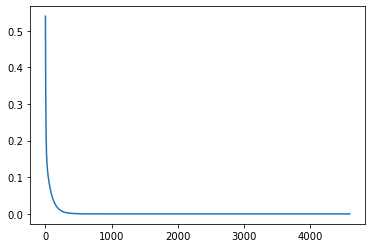

In [81]:
plt.plot(MLP.history['loss'])
plt.show()

dict_keys(['loss', 'val_loss'])


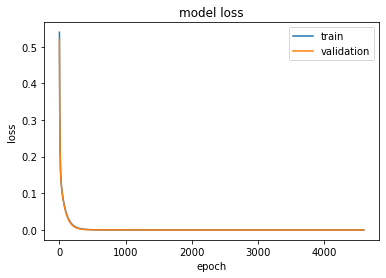

In [82]:
# plotting the loss curve for the train and validation
print(MLP.history.keys())
# "Loss"
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [83]:
tstF0 = prd[0]
tstF1 = prd[1]
tstF2 = prd[2]
tstF2.shape

(16, 2)

In [84]:
fold0 = labels[0]
fold1 = labels[1]
fold2 = labels[2]
type (fold1)
fold2.shape

(16, 2)

In [85]:
predF0 = min_max_scaler_Target.inverse_transform(tstF0)
predF1 = min_max_scaler_Target.inverse_transform(tstF1)
predF2 = min_max_scaler_Target.inverse_transform(tstF2)

In [86]:
predT0 = min_max_scaler_Target.inverse_transform(fold0)
predT1 = min_max_scaler_Target.inverse_transform(fold1)
predT2 = min_max_scaler_Target.inverse_transform(fold2)

In [87]:
error0 = predT0-predF0
error1 = predT1-predF1
error2 = predT2-predF2

In [88]:
print ('error in fold 1**************')
print (error0)
print ('error in fold 2**************')
print (error1)
print ('error in fold 3**************')
print (error2)

error in fold 1**************
[[ 0.0125   -0.2     ]
 [ 0.025     0.8     ]
 [-0.04375   0.      ]
 [ 0.01875  -0.6     ]
 [ 0.       -0.4     ]
 [-0.05     -0.5     ]
 [ 0.04375   0.1     ]
 [ 0.075    -0.2     ]
 [ 0.025    -0.3     ]
 [ 0.0375   -0.4     ]
 [-0.05     -0.6     ]
 [ 0.0375   -0.3     ]
 [ 0.01875  -0.1     ]
 [-0.065625  0.3     ]
 [-0.0125    0.2     ]
 [-0.04375   0.3     ]]
error in fold 2**************
[[-0.0375    0.      ]
 [ 0.       -0.4     ]
 [ 0.05625   0.      ]
 [-0.04375  -0.2     ]
 [-0.03125   0.7     ]
 [-0.01875   0.      ]
 [-0.065625 -0.5     ]
 [ 0.0125   -0.4     ]
 [-0.025     0.7     ]
 [-0.00625   0.3     ]
 [-0.0125   -0.1     ]
 [-0.025    -0.1     ]
 [ 0.025    -0.1     ]
 [ 0.009375 -0.2     ]
 [-0.0125    0.5     ]
 [-0.09375   0.4     ]]
error in fold 3**************
[[ 0.025    -0.3     ]
 [-0.01875   0.4     ]
 [-0.028125  0.3     ]
 [-0.034375  0.1     ]
 [-0.00625   0.      ]
 [-0.05625  -0.2     ]
 [ 0.1125   -0.5     ]
 [ 0.0625  

In [89]:
preds = models.predict(X_train)
print ()

In [90]:
#error in training
preds_proj = min_max_scaler_Target.inverse_transform(preds)
t = y_trainB-preds_proj
print (t)


           0    1
0   0.012500 -0.2
1   0.025000  0.8
2  -0.012500  0.0
3  -0.012500 -0.6
4   0.000000 -0.4
5  -0.050000 -0.5
6   0.012500  0.1
7   0.075000 -0.2
8   0.056250 -0.3
9   0.037500 -0.4
10 -0.050000 -0.6
11  0.037500 -0.3
12  0.018750 -0.1
13 -0.018750  0.3
14 -0.012500  0.2
15 -0.043750  0.3
16 -0.006250  0.0
17  0.000000 -0.4
18  0.087500  0.0
19 -0.012500 -0.2
20  0.000000  0.7
21  0.012500  0.0
22 -0.065625 -0.5
23  0.012500 -0.4
24 -0.025000  0.7
25 -0.006250  0.3
26  0.018750 -0.1
27 -0.025000 -0.1
28  0.056250 -0.1
29  0.009375 -0.2
30 -0.012500  0.5
31 -0.062500  0.4
32  0.025000 -0.3
33 -0.018750  0.4
34 -0.028125  0.3
35 -0.034375  0.1
36 -0.006250  0.0
37 -0.056250 -0.2
38  0.112500 -0.5
39  0.062500  0.0
40  0.050000 -0.7
41  0.050000 -0.1
42  0.062500  0.0
43 -0.056250  0.0
44  0.012500 -0.5
45  0.087500  0.0
46  0.018750  0.4
47 -0.012500 -0.3


In [91]:

import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_trainB, preds_proj)
math.sqrt(mse_true)

0.2564817295827161

In [92]:
mse_true

0.0657828776097415

In [93]:
import math
from sklearn.metrics import mean_squared_error
mse_true_1, mse_true_2, mse_true_3  = (mean_squared_error(predT0, predF0), mean_squared_error(predT1, predF1),
                                     mean_squared_error(predT2, predF2)) 
                                   
mse_true_1, mse_true_2, mse_true_3 

(0.0767422485862437, 0.06823059077152269, 0.052597045912557414)

In [94]:
rmse1, rmse2, rmse3  = (math.sqrt(mse_true_1), math.sqrt(mse_true_2), math.sqrt(mse_true_3))
rmse1, rmse2, rmse3 

(0.27702391338338234, 0.2612098596368879, 0.22934045851649773)

In [95]:

#X_test = test_data
predst = models.predict(X_test)

In [96]:
#error in testing
preds_projT = min_max_scaler_Target.inverse_transform(predst)
error = y_testB-preds_projT
print (error)

          0    1
0  -0.05000  0.4
1  -0.02500  0.3
2  -0.02500  0.0
3  -0.02500 -0.6
4   0.03125 -0.5
5  -0.00625 -0.7
6  -0.00625  0.2
7  -0.06875 -0.2
8  -0.01250 -0.4
9   0.00000  0.1
10 -0.01250  0.2
11 -0.03125  0.1
12  0.03750  0.2
13  0.06875  0.1
14  0.03125 -0.1
15 -0.03125  0.2
16  0.02500 -0.3


In [97]:

import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_testB, preds_projT)
math.sqrt(mse_true)

0.23390271030590304

In [98]:
import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_testB, preds_projT)
mse_true

0.054710477888447205

In [99]:
df = pd.DataFrame(t)

In [100]:
df.to_csv('fold8.csv', index=False)